In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import pickle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("D:\\Final year project\\car price prediction\\car_data_germany_cars.csv",low_memory=False )

In [3]:
df.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


In [4]:
l = list(df.model.unique())

In [5]:
df.size

417645

In [6]:
type(list(df['model'].iloc[0]))

list

In [7]:
df.iloc[0]

mileage      235000
make            BMW
model           316
fuel         Diesel
gear         Manual
offerType      Used
price          6800
hp            116.0
year           2011
Name: 0, dtype: object

In [8]:
df.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

In [9]:
d = {'mileage':[1],'make':['n'],'model':[0], 'fuel':["D"], 'gear':["m"], 'offerType':["u"], 'price':[0], 'hp':[0],'year':[0]}
#d = pd.DataFrame(d)

In [10]:
d = pd.DataFrame(d)
d

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,1,n,0,D,m,u,0,0,0


In [11]:
for i in range(len(df)):
    
    if df['model'].iloc[i] in l:
        d = pd.concat([d, pd.DataFrame(df.iloc[i]).T], ignore_index = True)
        l.remove(df['model'].iloc[i])

In [12]:
d.iloc[0:50]

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,1,n,0,D,m,u,0,0,0
1,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
2,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
3,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
4,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
5,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
6,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
7,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
8,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
9,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011


In [13]:
df.to_csv("file.csv",index=False)

In [14]:
df.model.nunique()

841

#### Project

In [15]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [16]:
df.shape

(46405, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [18]:
df.isna().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

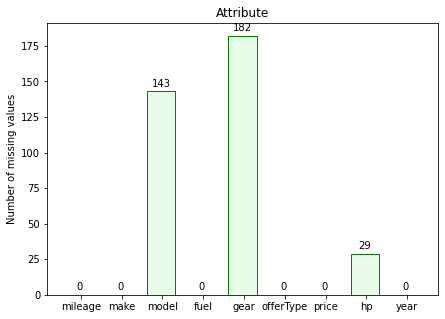

In [19]:
x = np.arange(9) # the label locations
width = 0.7 # the width of the bars

fig, ax = plt.subplots(figsize=(7,5))

ax.set_ylabel('Number of missing values')
ax.set_title('Attribute')
ax.set_xticks(x)
ax.set_xticklabels(df.columns)

pps = ax.bar(x - width/20,df.isna().sum() ,width, label='Count',color=(0.1,0.9,0.1,0.1),edgecolor=['green'])
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

In [20]:
df.sample(5)

,mileage,make,model,fuel,gear,offerType,price,hp,year
24169,185000,Mercedes-Benz,ML 350,Diesel,Automatic,Used,27490,258.0,2013
8354,35400,smart,forTwo,Gasoline,Manual,Used,7700,71.0,2017
42721,10,Ford,EcoSport,Gasoline,Manual,Used,17970,125.0,2018
6342,119500,Ford,Fiesta,Gasoline,Automatic,Used,6900,97.0,2011
34562,182490,Audi,A6,Diesel,Automatic,Used,12390,204.0,2011


In [21]:
df[df.price > 50000].sample(5)

,mileage,make,model,fuel,gear,offerType,price,hp,year
42833,63600,Land,Rover Range Rover Velar,Diesel,Automatic,Used,53800,300.0,2018
19236,10,Volkswagen,T6 Multivan,Diesel,Automatic,Pre-registered,70650,204.0,2021
44754,21400,Mercedes-Benz,C 63 AMG,Gasoline,Automatic,Employee's car,79850,476.0,2020
5048,12455,Mercedes-Benz,GLC 220,Diesel,Automatic,Employee's car,53150,194.0,2020
14324,9500,Audi,Q5,Electric/Gasoline,Automatic,Demonstration,62850,367.0,2020


In [22]:
# converting Euro to rupee
df.price = 80 * (df.price)

In [23]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,544000,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,550160,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,552000,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,556000,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,556000,156.0,2011


In [24]:
df['KMs_driven'] = df['mileage']
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,KMs_driven
0,235000,BMW,316,Diesel,Manual,Used,544000,116.0,2011,235000
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,550160,122.0,2011,92800
2,149300,SEAT,Exeo,Gasoline,Manual,Used,552000,160.0,2011,149300
3,96200,Renault,Megane,Gasoline,Manual,Used,556000,110.0,2011,96200
4,156000,Peugeot,308,Gasoline,Manual,Used,556000,156.0,2011,156000


In [25]:
df.drop(['mileage'],axis=1,inplace=True)

In [26]:
df.head(2)

,make,model,fuel,gear,offerType,price,hp,year,KMs_driven
0,BMW,316,Diesel,Manual,Used,544000,116.0,2011,235000
1,Volkswagen,Golf,Gasoline,Manual,Used,550160,122.0,2011,92800


## Renaming columns

In [27]:
df.rename(columns={'make':'Brand' , 'model':"Model","fule":'Fule_type','gear':"Gear_type",'hp':'Hp','price':"Price",
                   'year':'Year'},inplace=True)
df.sample(5)

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,Year,KMs_driven
2974,Ford,Kuga,Diesel,Automatic,Used,680000,140.0,2013,166831
5102,Peugeot,308,Gasoline,Manual,Used,797600,156.0,2012,136000
13157,Hyundai,iX35,Gasoline,Manual,Used,956000,135.0,2014,53700
39489,Renault,Grand Scenic,Diesel,Manual,Used,752000,131.0,2015,144500
36195,Nissan,Note,Gasoline,Manual,Used,624000,80.0,2013,58489


In [28]:
df.Brand.value_counts().sort_values()

Zhidou           1
9ff              1
Brilliance       1
FISKER           1
Tazzari          1
              ... 
Renault       2830
Skoda         2889
Ford          4442
Opel          4814
Volkswagen    6931
Name: Brand, Length: 77, dtype: int64

In [29]:
df.Brand.value_counts()

Volkswagen    6931
Opel          4814
Ford          4442
Skoda         2889
Renault       2830
              ... 
DAF              1
Isuzu            1
Trucks-Lkw       1
Tazzari          1
Zhidou           1
Name: Brand, Length: 77, dtype: int64

In [30]:
df.Brand.value_counts().sort_values().head(50)

Zhidou                1
9ff                   1
Brilliance            1
FISKER                1
Tazzari               1
Isuzu                 1
Trucks-Lkw            1
DAF                   1
RAM                   2
Estrima               2
DFSK                  2
Morgan                2
Baic                  3
Rolls-Royce           3
Caravans-Wohnm        3
Corvette              3
Maybach               3
Aixam                 3
Trailer-Anhänger      4
Polestar              4
Iveco                 4
Chrysler              5
Piaggio               5
Alpine                5
Ligier                5
Cadillac              7
Lamborghini           9
Alpina               10
Daihatsu             10
McLaren              11
Ferrari              11
Maserati             12
Microcar             12
Bentley              15
Infiniti             15
DS                   16
Lancia               18
Dodge                23
Tesla                24
Others               25
Aston                30
Lada            

In [31]:
df.groupby('Brand').filter(lambda x : len(x)<101).shape

(597, 9)

In [32]:
change_index = df.groupby('Brand').filter(lambda x : len(x)<101)
change_index.index

Int64Index([   93,    99,   142,   347,   365,   375,   525,   598,   599,
              600,
            ...
            46279, 46280, 46289, 46291, 46329, 46330, 46331, 46333, 46334,
            46352],
           dtype='int64', length=597)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       46405 non-null  object 
 1   Model       46262 non-null  object 
 2   fuel        46405 non-null  object 
 3   Gear_type   46223 non-null  object 
 4   offerType   46405 non-null  object 
 5   Price       46405 non-null  int64  
 6   Hp          46376 non-null  float64
 7   Year        46405 non-null  int64  
 8   KMs_driven  46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [34]:
df.shape

(46405, 9)

### Filling those brand with 'other' which has frequency less than 101

In [35]:
df.loc[change_index.index,['Brand']] = 'Other'

In [36]:
df.sample(10)

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,Year,KMs_driven
44010,Audi,Q7,Diesel,Automatic,Used,4878800,286.0,2019,66526
21389,BMW,435,Gasoline,Automatic,Used,2194400,306.0,2013,106500
14245,Opel,Corsa,Diesel,Manual,Used,592000,75.0,2016,76000
8815,smart,forTwo,Gasoline,Manual,Used,759200,71.0,2019,17900
17543,Fiat,500,Gasoline,Manual,Pre-registered,918400,69.0,2020,6666
5434,Ford,Fiesta,Gasoline,Manual,Used,715200,71.0,2018,39751
43853,Hyundai,Santa Fe,Diesel,Automatic,Used,2772000,200.0,2019,32419
17082,Fiat,500,Gasoline,Manual,Used,944000,65.0,2019,27871
40607,Mercedes-Benz,E 200,Diesel,Automatic,Used,1831200,150.0,2016,75000
15629,Renault,Megane,Diesel,Manual,Used,400000,131.0,2011,189500


### Checking value counts for Model column

In [37]:
df.Model.value_counts().sort_values().head(725)

NV250          1
e              1
NSX            1
GLS 600        1
124 Spider     1
              ..
B 200         95
iX35          96
500L          97
Juke          98
Q2            98
Name: Model, Length: 725, dtype: int64

### Filling those Model with 'other' which has frequency less than 101

In [38]:
df.groupby('Model').filter(lambda x : len(x)<101).shape

(11520, 9)

In [39]:
change_index = df.groupby('Model').filter(lambda x : len(x)<101)
change_index.index

Int64Index([    0,     2,    12,    13,    16,    17,    18,    23,    24,
               25,
            ...
            46373, 46374, 46375, 46376, 46379, 46380, 46381, 46382, 46383,
            46384],
           dtype='int64', length=11520)

In [40]:
df.loc[change_index.index , 'Model'] = 'Other'

In [41]:
df.sample(10)

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,Year,KMs_driven
25065,Renault,Other,Electric,Automatic,Used,392000,11.0,2016,13200
23483,Mercedes-Benz,Other,Diesel,Automatic,Used,1175200,265.0,2012,183838
20332,BMW,530,Diesel,Automatic,Used,1560000,300.0,2013,155000
10204,Opel,Astra,Gasoline,Manual,Used,956000,150.0,2016,67500
14509,Volkswagen,Golf,Gasoline,Manual,Used,911200,86.0,2018,63900
40869,Toyota,Aygo,Gasoline,Manual,Used,591120,69.0,2017,51170
41993,Porsche,Other,Gasoline,Manual,Used,14719280,500.0,2018,990
18753,Opel,Adam,Gasoline,Manual,Used,1079200,90.0,2016,13150
25140,Jaguar,Other,Electric,Automatic,Demonstration,4920000,400.0,2020,3666
37401,Toyota,Yaris,Electric/Gasoline,Automatic,Used,839920,75.0,2014,27999


In [42]:
# checking the unique values of Model and Brand column
df.Brand.nunique()

31

In [43]:
df.Model.nunique()

117

### Checking  the null values

In [44]:
df.isna().sum()

Brand           0
Model         143
fuel            0
Gear_type     182
offerType       0
Price           0
Hp             29
Year            0
KMs_driven      0
dtype: int64

As we have more than enough data. So we will drop the null value data

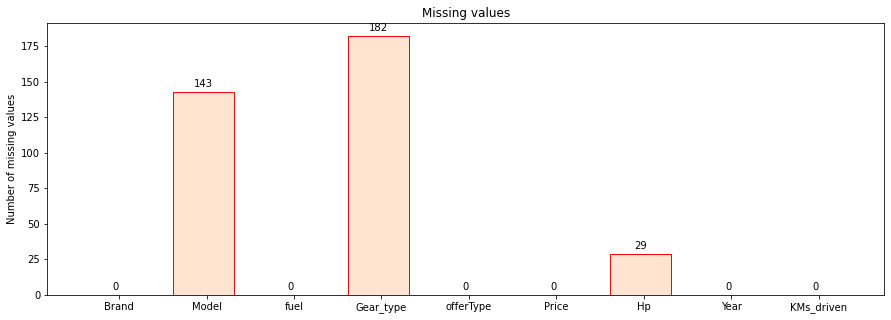

In [45]:
x = np.arange(9) # the label locations
width = 0.7 # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))

ax.set_ylabel('Number of missing values')
ax.set_title('Missing values')
ax.set_xticks(x)
ax.set_xticklabels(df.columns)

pps = ax.bar(x - width/20,df.isna().sum() ,width, label='Count',color=(1,0.5,0.1,0.2),edgecolor=['red'])
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

In [46]:
df_copy = df.copy()

In [47]:
df_copy.dropna(inplace=True)

In [48]:
df_copy.isna().sum()

Brand         0
Model         0
fuel          0
Gear_type     0
offerType     0
Price         0
Hp            0
Year          0
KMs_driven    0
dtype: int64

In [49]:
df_copy

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,Year,KMs_driven
0,BMW,Other,Diesel,Manual,Used,544000,116.0,2011,235000
1,Volkswagen,Golf,Gasoline,Manual,Used,550160,122.0,2011,92800
2,SEAT,Other,Gasoline,Manual,Used,552000,160.0,2011,149300
3,Renault,Megane,Gasoline,Manual,Used,556000,110.0,2011,96200
4,Peugeot,308,Gasoline,Manual,Used,556000,156.0,2011,156000
...,...,...,...,...,...,...,...,...,...
46400,Fiat,500,Electric/Gasoline,Manual,Pre-registered,1039200,71.0,2021,99
46401,Fiat,500,Electric/Gasoline,Manual,Pre-registered,1039200,71.0,2021,99
46402,Fiat,500,Electric/Gasoline,Manual,Pre-registered,1039200,71.0,2021,99
46403,Fiat,500,Electric/Gasoline,Manual,Pre-registered,1039200,71.0,2021,99


In [50]:
df_copy.dtypes

Brand          object
Model          object
fuel           object
Gear_type      object
offerType      object
Price           int64
Hp            float64
Year            int64
KMs_driven      int64
dtype: object

In [51]:
d = {'Brand':['n'],'Model':["n"], 'fuel':["D"], 'Gear_type':["m"], 'offerType':["u"], 'Price':[0], 'Hp':[0.0],'Year':[0],'KMs_driven':[1]}
d = pd.DataFrame(d)

l= list(df_copy.Model.unique())

In [52]:
l= list(df_copy.Brand.unique())
print(l)

['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota', 'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi', 'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen', 'Other', 'Suzuki', 'smart', 'Volvo', 'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Mitsubishi', 'Jeep', 'Land', 'Alfa']


In [53]:
l = sorted(l)
print(l)

['Alfa', 'Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Other', 'Peugeot', 'Porsche', 'Renault', 'SEAT', 'Skoda', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo', 'smart']


In [54]:
l= list(df_copy.Model.unique())
print(l)

['Other', 'Golf', 'Megane', '308', 'Auris', 'Scenic', 'Zafira', '3', 'Transit', 'Meriva', 'A4', 'Polo', 'Corsa', 'Picanto', 'Duster', '118', 'Astra', 'Focus', 'B 180', 'Insignia', 'One', '320', 'Adam', '520', 'B-Max', 'Golf Variant', 'Touran', 'Leon', 'A1', 'Golf Plus', 'Fiesta', 'Yaris', 'iX20', 'up!', 'Rapid/Spaceback', '116', 'Passat Variant', "Ceed / cee'd", 'Fabia', 'Ibiza', 'C-Max', 'Superb', '208', 'Swift', 'Sandero', '2', 'A6', 'forTwo', 'Mii', 'Citigo', 'Aygo', 'i10', 'forFour', 'Tiguan', 'Ateca', 'Q5', 'XC90', 'X3', 'T-Roc', 'Vito', 'Kuga', 'Touareg', 'Panda', 'Qashqai', 'Passat', 'Octavia', 'Mondeo', '2008', 'i20', 'Yeti', 'Captur', 'Clio', 'C4', 'Rio', 'Caddy', 'ZOE', 'C3', 'Micra', 'Twingo', 'Ka/Ka+', 'Space Star', '500', 'XC60', 'Arona', 'EcoSport', 'Puma', 'i30', '207', 'A3', 'E 200', 'Logan', 'Mokka', 'S-Max', '530', 'E 220', 'A5', 'V60', 'C 220', 'Tucson', 'A 180', '108', 'Zafira Tourer', 'Kodiaq', 'CX-5', 'Sharan', '500C', 'C1', '318', '6', 'Q3', 'X1', 'Karl', 'Kangoo

In [55]:
l = sorted(l)
print(l)

['108', '116', '118', '2', '2008', '207', '208', '3', '308', '318', '320', '500', '500C', '520', '530', '6', 'A 180', 'A1', 'A3', 'A4', 'A5', 'A6', 'Adam', 'Arona', 'Astra', 'Ateca', 'Auris', 'Aygo', 'B 180', 'B-Max', 'C 180', 'C 200', 'C 220', 'C-Max', 'C1', 'C3', 'C4', 'CX-5', 'Caddy', 'Captur', "Ceed / cee'd", 'Citigo', 'Clio', 'Corsa', 'Duster', 'E 200', 'E 220', 'EcoSport', 'Fabia', 'Fiesta', 'Focus', 'Golf', 'Golf Plus', 'Golf Sportsvan', 'Golf Variant', 'Ibiza', 'Insignia', 'Ka/Ka+', 'Kangoo', 'Karl', 'Kodiaq', 'Kuga', 'Leon', 'Logan', 'Megane', 'Meriva', 'Micra', 'Mii', 'Mokka', 'Mondeo', 'Octavia', 'One', 'Other', 'Panda', 'Passat', 'Passat Variant', 'Picanto', 'Polo', 'Puma', 'Q3', 'Q5', 'Qashqai', 'Rapid/Spaceback', 'Rio', 'S-Max', 'Sandero', 'Scenic', 'Sharan', 'Space Star', 'Sportage', 'Superb', 'Swift', 'T-Roc', 'Tiguan', 'Touareg', 'Touran', 'Transit', 'Tucson', 'Twingo', 'V60', 'Vito', 'X1', 'X3', 'XC60', 'XC90', 'Yaris', 'Yeti', 'ZOE', 'Zafira', 'Zafira Tourer', 'forFo

In [56]:
for i in range(len(df_copy)):
    
    if df_copy['Model'].iloc[i] in l:
        d = pd.concat([d, pd.DataFrame(df_copy.iloc[i]).T], ignore_index = True)
        l.remove(df_copy['Model'].iloc[i])
        

In [57]:
d

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,Year,KMs_driven
0,n,n,D,m,u,0,0.0,0,1
1,BMW,Other,Diesel,Manual,Used,544000,116.0,2011,235000
2,Volkswagen,Golf,Gasoline,Manual,Used,550160,122.0,2011,92800
3,Renault,Megane,Gasoline,Manual,Used,556000,110.0,2011,96200
4,Peugeot,308,Gasoline,Manual,Used,556000,156.0,2011,156000
...,...,...,...,...,...,...,...,...,...
113,Renault,Kangoo,Diesel,Manual,Used,600000,75.0,2014,80000
114,Mercedes-Benz,C 200,Gasoline,Automatic,Employee's car,2630080,184.0,2020,19982
115,Volkswagen,Golf Sportsvan,Diesel,Manual,Used,878400,150.0,2015,133500
116,Kia,Sportage,Diesel,Automatic,Used,2239200,185.0,2018,29065


In [58]:
d.to_csv("file.csv",index=False)

## EDA

In [59]:
df_copy.head()

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,Year,KMs_driven
0,BMW,Other,Diesel,Manual,Used,544000,116.0,2011,235000
1,Volkswagen,Golf,Gasoline,Manual,Used,550160,122.0,2011,92800
2,SEAT,Other,Gasoline,Manual,Used,552000,160.0,2011,149300
3,Renault,Megane,Gasoline,Manual,Used,556000,110.0,2011,96200
4,Peugeot,308,Gasoline,Manual,Used,556000,156.0,2011,156000


Text(0.5, 1.0, 'Number of cars of each Car Brand')

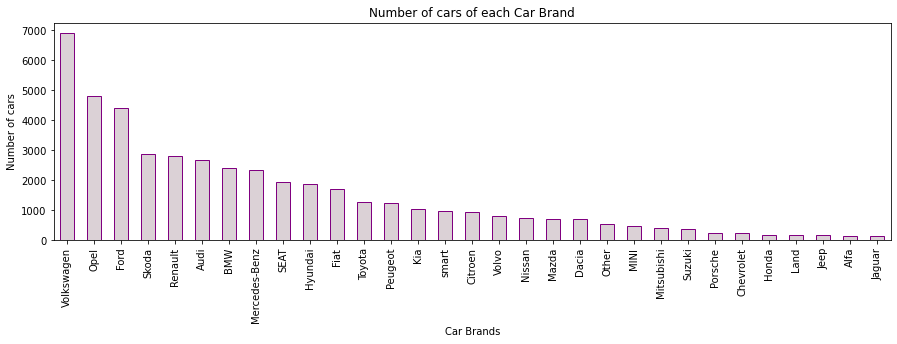

In [60]:
plt.figure(figsize=(15,4))
df_copy.Brand.value_counts().plot(kind='bar',color=(0.3,0.1,0.2,0.2),edgecolor=['purple'])
plt.xlabel("Car Brands")
plt.ylabel("Number of cars")
plt.title("Number of cars of each Car Brand")

In [61]:
a = df[df.Model != 'Other']

Text(0.5, 1.0, 'Number of cars of each model')

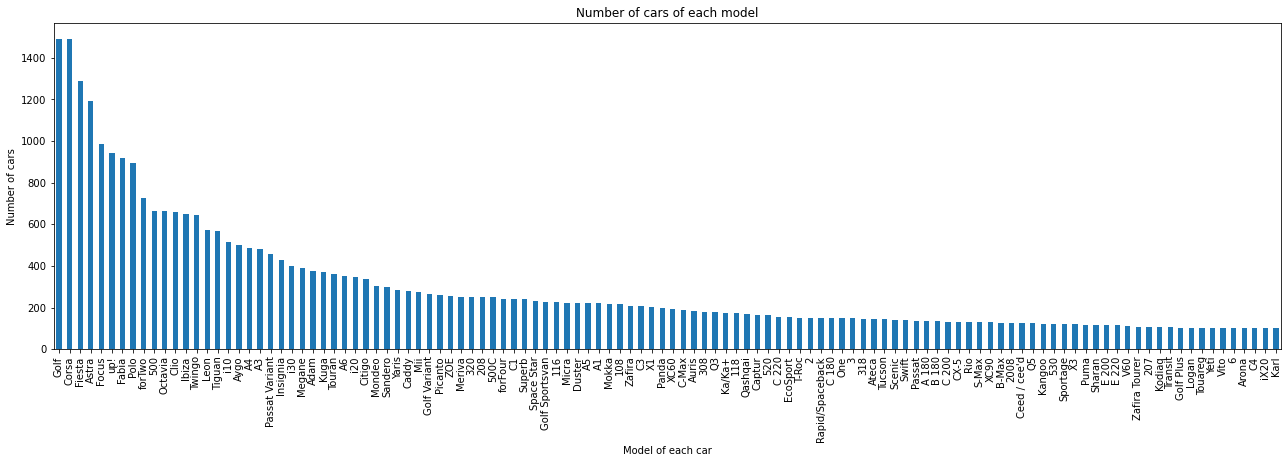

In [62]:
plt.figure(figsize=(22,6))
a.Model.value_counts().plot(kind='bar')
plt.xlabel("Model of each car")
plt.ylabel("Number of cars")
plt.title("Number of cars of each model")

In [63]:
df.fuel.value_counts()

Gasoline             28864
Diesel               15244
Electric/Gasoline     1158
Electric               758
LPG                    126
CNG                    117
Others                  56
Electric/Diesel         53
-/- (Fuel)              26
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

In [64]:
# Replacing values with common values
df_copy['fuel'] = df_copy['fuel'].replace( ['Electric/Gasoline', 'Electric/Diesel', 'Electric'], 'Electric') 

df_copy['fuel'] = df_copy['fuel'].replace( ['Others', '-/- (Fuel)', 'Ethanol', 'Hydrogen'], 'Others') 

<AxesSubplot:>

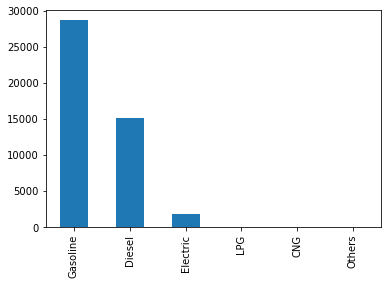

In [65]:
df_copy.fuel.value_counts().plot(kind ='bar')

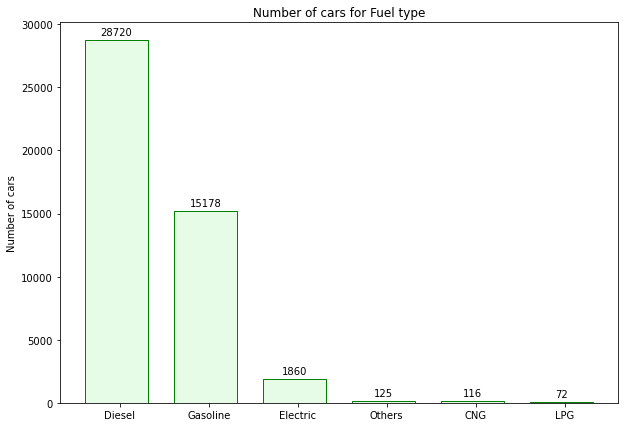

In [66]:
x = np.arange(df_copy.fuel.nunique()) # the label locations
width = 0.7 # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))

ax.set_ylabel('Number of cars')
ax.set_title('Number of cars for Fuel type')
ax.set_xticks(x)
ax.set_xticklabels(df_copy.fuel.unique())

pps = ax.bar(x - width/20,df_copy.fuel.value_counts() ,width, label='Count',color=(0.1,0.9,0.1,0.1),edgecolor=['green'])
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

In [67]:
df_copy.fuel.value_counts().max()

28720

In [68]:
df_copy.fuel.value_counts()

Gasoline    28720
Diesel      15178
Electric     1860
LPG           125
CNG           116
Others         72
Name: fuel, dtype: int64

<AxesSubplot:>

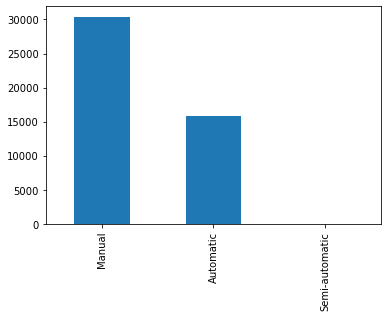

In [69]:
df.Gear_type.value_counts().plot(kind='bar')

In [70]:
df_copy.Gear_type.unique()

array(['Manual', 'Automatic', 'Semi-automatic'], dtype=object)

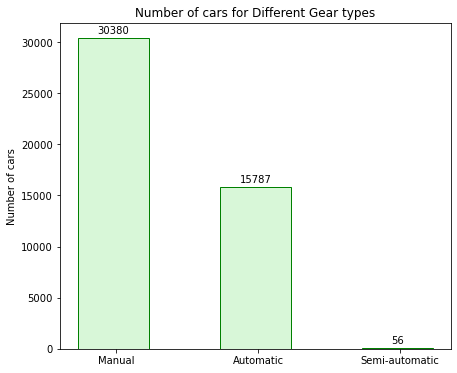

In [71]:
x = np.arange(df_copy.Gear_type.nunique()) # the label locations
width = 0.5 # the width of the bars

fig, ax = plt.subplots(figsize=(7,6))

ax.set_ylabel('Number of cars')
ax.set_title('Number of cars for Different Gear types')
ax.set_xticks(x)
ax.set_xticklabels(df_copy.Gear_type.unique())

pps = ax.bar(x - width/25,df.Gear_type.value_counts() ,width, label='population',color=(0.5,0.9,0.5,0.3),edgecolor=['green'])
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

In [72]:
df_copy['Gear_type'].value_counts()

Manual            30309
Automatic         15706
Semi-automatic       56
Name: Gear_type, dtype: int64

In [73]:
df_copy.offerType.value_counts()

Used              39822
Pre-registered     2768
Demonstration      2351
Employee's car     1117
New                  13
Name: offerType, dtype: int64

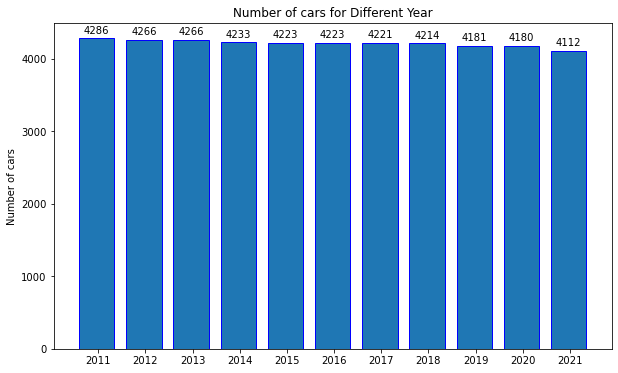

In [74]:
x = np.arange(df_copy.Year.nunique()) # the label locations
width = 0.75 # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))

ax.set_ylabel('Number of cars')
ax.set_title('Number of cars for Different Year')
ax.set_xticks(x)
ax.set_xticklabels(df_copy.Year.unique())

pps = ax.bar(x - width/25,df.Year.value_counts() ,width, label='population',edgecolor=['blue'])
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

In [75]:
df_copy.head()

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,Year,KMs_driven
0,BMW,Other,Diesel,Manual,Used,544000,116.0,2011,235000
1,Volkswagen,Golf,Gasoline,Manual,Used,550160,122.0,2011,92800
2,SEAT,Other,Gasoline,Manual,Used,552000,160.0,2011,149300
3,Renault,Megane,Gasoline,Manual,Used,556000,110.0,2011,96200
4,Peugeot,308,Gasoline,Manual,Used,556000,156.0,2011,156000


D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


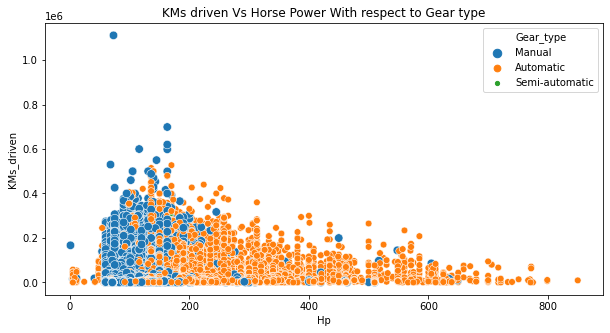

In [76]:
plt.figure(figsize=(10,5))
plt.title("KMs driven Vs Horse Power With respect to Gear type")
sns.scatterplot(df_copy.Hp , df_copy.KMs_driven , hue = df_copy.Gear_type , size= df_copy.Gear_type)
plt.show()

D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


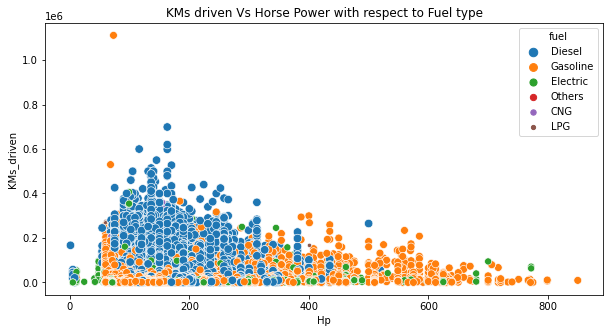

In [77]:
plt.figure(figsize=(10,5))
plt.title("KMs driven Vs Horse Power with respect to Fuel type")
sns.scatterplot(df_copy.Hp , df_copy.KMs_driven , hue = df_copy.fuel ,size= df_copy.fuel)
plt.show()

### Adding a new column called Age which will tell the age of the car

In [78]:
from datetime import datetime
df_copy['Age'] = datetime.now().year - df_copy['Year']
df_copy.sample(10)

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,Year,KMs_driven,Age
40137,Renault,Captur,Diesel,Manual,Used,759200,90.0,2016,113761,6
24539,Suzuki,Other,Electric,Automatic,Pre-registered,1917200,122.0,2021,10,1
3113,Hyundai,i30,Electric,Manual,Demonstration,2159200,160.0,2020,150,2
22306,Volkswagen,Golf Variant,Diesel,Manual,Used,1599840,150.0,2016,32300,6
23198,Skoda,Other,Diesel,Automatic,Used,1720000,116.0,2019,10,3
43317,Skoda,Citigo,Gasoline,Manual,Used,876000,60.0,2019,4876,3
20433,Audi,Other,Diesel,Manual,Used,1558400,116.0,2019,77498,3
11203,Mazda,6,Diesel,Manual,Used,496000,163.0,2012,189000,10
21165,Audi,A4,Gasoline,Automatic,Used,1271200,224.0,2013,43864,9
15728,Opel,Corsa,Gasoline,Manual,Used,597600,69.0,2016,51700,6


In [79]:
df = df_copy

In [80]:
df_copy.sample(10)

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,Year,KMs_driven,Age
2231,Volvo,Other,Diesel,Automatic,Used,2398400,190.0,2019,24430,3
23185,Opel,Astra,Gasoline,Manual,Used,1559200,131.0,2019,1282,3
27491,Fiat,Other,Diesel,Manual,Used,240000,75.0,2011,129000,11
21813,Volkswagen,Caddy,Gasoline,Manual,Used,559200,86.0,2013,68068,9
42328,Opel,Other,Gasoline,Manual,Used,1063200,110.0,2018,27351,4
41480,Volkswagen,Golf Sportsvan,Gasoline,Automatic,Used,1220800,125.0,2017,52673,5
15717,Volkswagen,up!,Gasoline,Manual,Used,623120,75.0,2015,48000,7
32768,Mercedes-Benz,Other,Gasoline,Automatic,Used,2151040,122.0,2019,23000,3
43302,Hyundai,i20,Gasoline,Manual,Used,703120,75.0,2019,50680,3
13885,Mercedes-Benz,Vito,Diesel,Manual,Demonstration,2946480,163.0,2020,6000,2


### Detecting outliers

D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

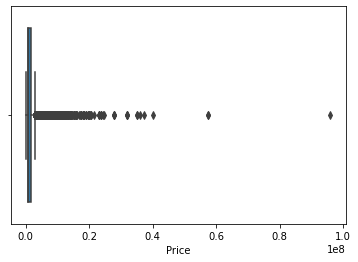

In [81]:
sns.boxplot(df_copy['Price'])

D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outliers')

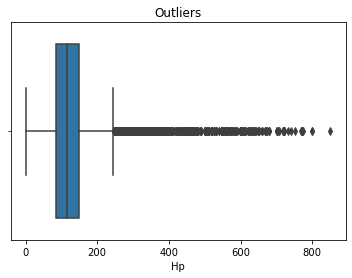

In [82]:
sns.boxplot(df_copy['Hp'])
plt.title("Outliers")

In [83]:
df_copy[df_copy['Hp']>700]

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,Year,KMs_driven,Age
1814,Other,Other,Gasoline,Automatic,Used,7119200,717.0,2020,1,2
7381,Other,Other,Gasoline,Automatic,Employee's car,23156000,721.0,2021,4500,1
7382,Other,Other,Gasoline,Automatic,Demonstration,24792000,721.0,2021,1499,1
7383,Other,Other,Gasoline,Automatic,Employee's car,35192000,770.0,2021,14090,1
7384,Other,Other,Gasoline,Automatic,Used,35992000,770.0,2021,3600,1
10682,Other,Other,Gasoline,Automatic,Used,5024000,717.0,2019,12746,3
14269,BMW,Other,Gasoline,Automatic,Used,14756000,733.0,2017,1780,5
18418,Other,Other,Gasoline,Automatic,Employee's car,23112000,721.0,2021,2500,1
18419,Other,Other,Gasoline,Automatic,Demonstration,35192000,799.0,2021,6500,1
19249,Other,Other,Gasoline,Automatic,New,24392000,721.0,2021,47,1


D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KMs_driven'>

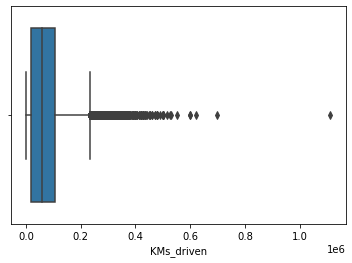

In [84]:
sns.boxplot(df_copy['KMs_driven'])

D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

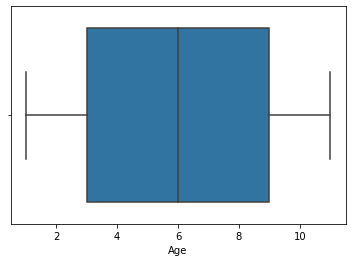

In [85]:
sns.boxplot(df_copy['Age'])

### Removing outliers

In [86]:
from scipy import stats

df_copy = df_copy[stats.zscore(df_copy.Price) < 3] 
df_copy = df_copy[stats.zscore(df_copy.Hp) < 3] 
df_copy = df_copy[stats.zscore(df_copy.KMs_driven) < 3] 

In [87]:
df_copy.sample(5)

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,Year,KMs_driven,Age
45244,Nissan,Other,Gasoline,Manual,Pre-registered,1639200,117.0,2021,11,1
21595,Peugeot,Other,Diesel,Manual,Used,296000,68.0,2012,150000,10
42968,Volkswagen,Passat Variant,Electric,Automatic,Used,2878400,156.0,2019,3385,3
33295,Dacia,Logan,Gasoline,Manual,Used,440000,75.0,2013,61350,9
8052,Skoda,Yeti,Gasoline,Manual,Used,684800,105.0,2012,79665,10


In [88]:
df = df_copy

In [89]:
df_copy.drop(['Year'],axis=1,inplace=True)

In [90]:
df.corr()

,Price,Hp,KMs_driven,Age
Price,1.000000,0.709029,-0.437959,-0.605638
Hp,0.709029,1.000000,0.065118,-0.142730
KMs_driven,-0.437959,0.065118,1.000000,0.706633
Age,-0.605638,-0.142730,0.706633,1.000000


<AxesSubplot:>

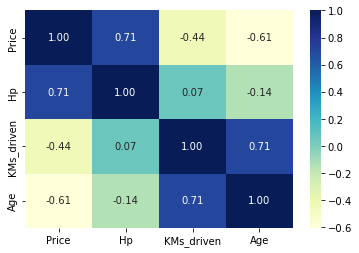

In [91]:
sns.heatmap(df.corr(), annot=True , fmt='.2f', cmap= 'YlGnBu')

In [92]:
df= df_copy
df.head()

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,KMs_driven,Age
0,BMW,Other,Diesel,Manual,Used,544000,116.0,235000,11
1,Volkswagen,Golf,Gasoline,Manual,Used,550160,122.0,92800,11
2,SEAT,Other,Gasoline,Manual,Used,552000,160.0,149300,11
3,Renault,Megane,Gasoline,Manual,Used,556000,110.0,96200,11
4,Peugeot,308,Gasoline,Manual,Used,556000,156.0,156000,11


## 1. Drop Brand, Model then convert fuel , geat_type , offerType to numerical column then form model

In [93]:
df_copy = df.copy()

In [94]:
df_copy.drop(['Model','Brand'], axis=1,inplace=True)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x= df_copy.drop(['Price'], axis=1)
y= df_copy.Price

In [97]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

In [98]:
x_train.shape , x_test.shape

((35310, 6), (8828, 6))

In [99]:
x_train.dtypes

fuel           object
Gear_type      object
offerType      object
Hp            float64
KMs_driven      int64
Age             int64
dtype: object

In [100]:
# getting name of object columns
object_col = x_train.dtypes[x_train.dtypes == "object"]
object_col = list(object_col.index)
object_col

['fuel', 'Gear_type', 'offerType']

In [101]:
from sklearn.preprocessing import OneHotEncoder

In [102]:
ohe = OneHotEncoder(handle_unknown = 'ignore' , sparse=False)

In [103]:
x_train_ohe = pd.DataFrame(ohe.fit_transform(x_train[object_col]))
x_test_ohe = pd.DataFrame(ohe.transform(x_test[object_col]))

In [104]:
x_test.head()

,fuel,Gear_type,offerType,Hp,KMs_driven,Age
8108,Gasoline,Manual,Used,140.0,60100,7
36841,Diesel,Automatic,Used,204.0,131800,9
4420,Gasoline,Manual,Employee's car,75.0,11100,2
25752,Gasoline,Manual,Used,150.0,16290,2
17094,Diesel,Manual,Used,116.0,10950,3


In [105]:
# putting index back
x_train_ohe.index = x_train.index
x_test_ohe.index = x_test.index
x_test_ohe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
8108,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
36841,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4420,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
25752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17094,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [106]:
# adding column names back
x_train_ohe.columns = ohe.get_feature_names(object_col)
x_test_ohe.columns = ohe.get_feature_names(object_col)
x_train_ohe.head()

D:\Anaconda\in\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\in\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_LPG,fuel_Others,Gear_type_Automatic,Gear_type_Manual,Gear_type_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
1278,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
24854,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
42262,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1016,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
33730,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [107]:
x_test_ohe.head()

,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_LPG,fuel_Others,Gear_type_Automatic,Gear_type_Manual,Gear_type_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
8108,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
36841,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4420,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
25752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17094,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [108]:
x_train_num = x_train.drop(object_col , axis=1)
x_test_num = x_test.drop(object_col, axis=1)

In [109]:
# adding one hot encoded cols to numerical features
x_train_num = pd.concat([x_train_num , x_train_ohe] , axis=1)
x_test_num = pd.concat([x_test_num , x_test_ohe] , axis=1)

In [110]:
x_test_num.head()

,Hp,KMs_driven,Age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_LPG,fuel_Others,Gear_type_Automatic,Gear_type_Manual,Gear_type_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
8108,140.0,60100,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
36841,204.0,131800,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4420,75.0,11100,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
25752,150.0,16290,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17094,116.0,10950,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


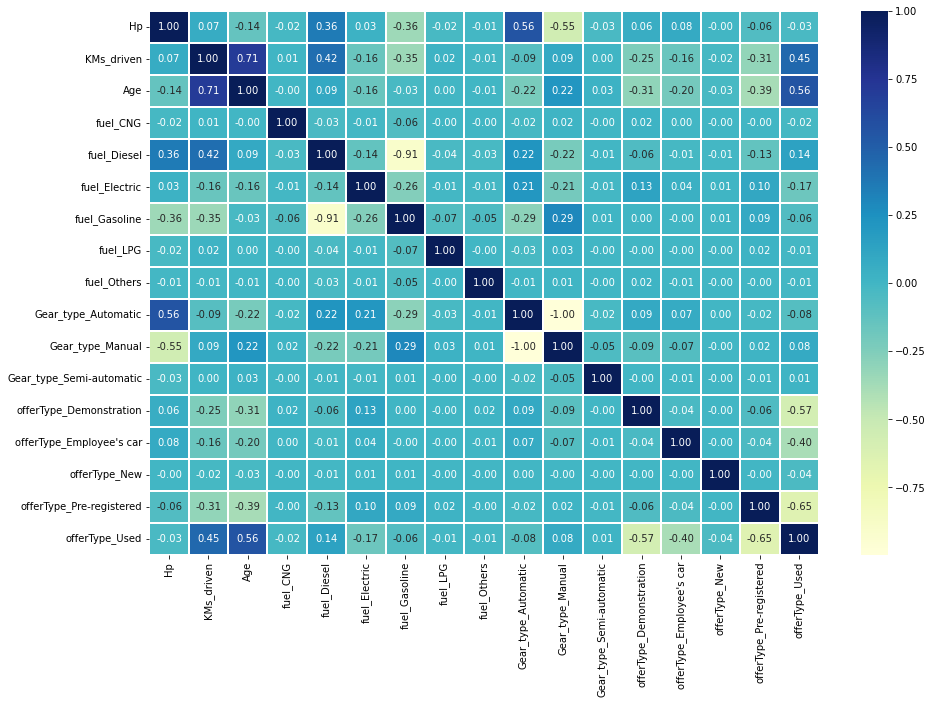

In [111]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(x_train_num.corr() ,annot=True , fmt='.2f' ,linewidths=0.2, cmap = 'YlGnBu')
plt.show()

#### Saving heatmap with white background

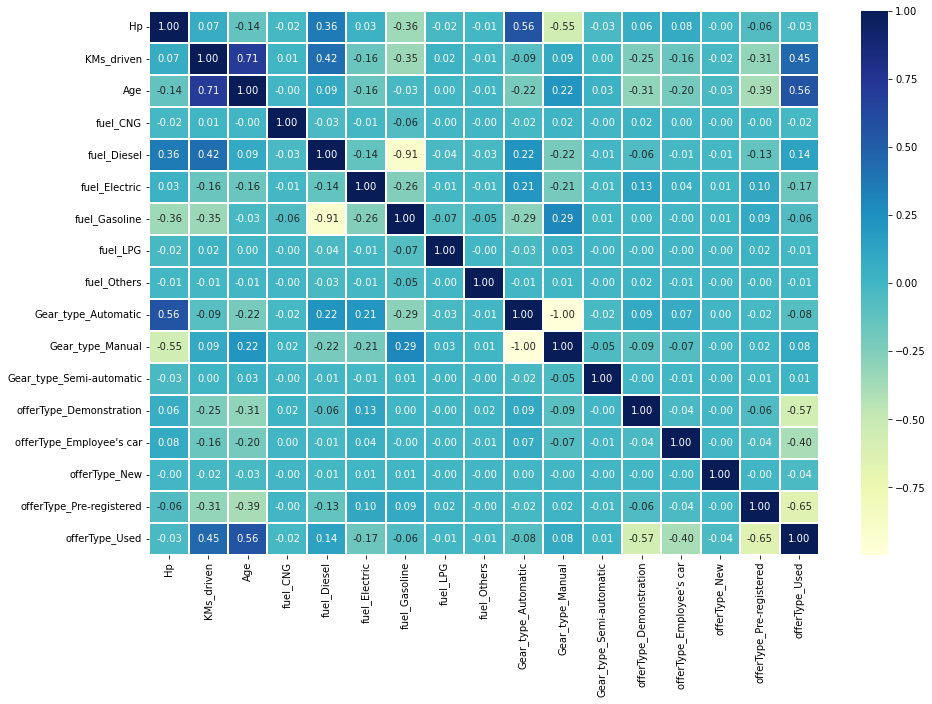

In [112]:
ax = plt.figure(figsize=(15,10))
#ax = plt.axes()
ax.set(facecolor='white')
sns.heatmap(x_train_num.corr() ,annot=True , fmt='.2f' ,linewidths=0.2, cmap = 'YlGnBu')

plt.savefig('heat_map1.png',dpi = 200)

#### Modeling

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr = LinearRegression()

In [115]:
lr.fit(x_train_num , y_train)

LinearRegression()

In [116]:
y_pred = lr.predict(x_test_num)

In [117]:
from sklearn.metrics import r2_score

print(r2_score(y_test , y_pred))

0.8196870521924308


In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rf = RandomForestRegressor()

In [120]:
rf.fit(x_train_num , y_train)

RandomForestRegressor()

In [121]:
y_pred = rf.predict(x_test_num )
print(r2_score(y_test , y_pred ))

0.8973221936176194


In [122]:
x_train_num.tail()

,Hp,KMs_driven,Age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_LPG,fuel_Others,Gear_type_Automatic,Gear_type_Manual,Gear_type_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
6639,110.0,185500,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11858,136.0,70000,9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
39915,184.0,70705,6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
949,69.0,29783,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
16557,179.0,94813,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [123]:
y_train.tail()

6639      679200
11858    1032000
39915    1599200
949       628000
16557    1031200
Name: Price, dtype: int64

In [124]:
type(x_test_num.iloc[8180])

pandas.core.series.Series

In [125]:
p = [[179.0, 94813, 8, 0.0, 0.0,0.0 , 1.0 ,0.0 , 0.0,0.0 , 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]
rf.predict(p)

D:\Anaconda\in\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1047206.4])

#### Applying scaling and then modeling

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()

In [128]:
x_train_scaled = scaler.fit_transform(x_train_num)
x_test_scaled = scaler.transform(x_test_num)

In [129]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns= x_train_num.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns=  x_test_num.columns)

In [130]:
# linear Regression
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [131]:
y_pred = lr.predict(x_test_scaled)
print(r2_score(y_test , y_pred ))

0.8196411627292063


### Plotting scaling

D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Before Scaling'}, xlabel='Hp', ylabel='KMs_driven'>

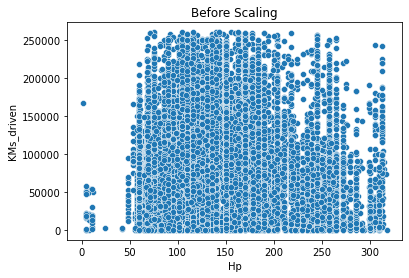

In [132]:
plt.title("Before Scaling")
sns.scatterplot(x_train.Hp , x_train.KMs_driven)

D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'After Scaling'}, xlabel='Hp', ylabel='KMs_driven'>

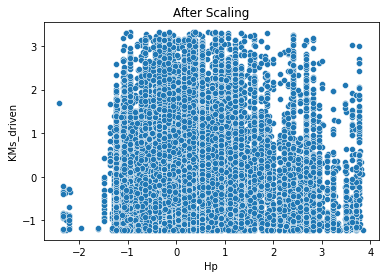

In [133]:
plt.title("After Scaling")
sns.scatterplot(x_train_scaled.Hp , x_train_scaled.KMs_driven)

In [134]:
# Random forest regressor
rf = RandomForestRegressor()
rf.fit(x_train_scaled , y_train)

RandomForestRegressor()

In [135]:
y_pred = rf.predict(x_test_scaled)
print(r2_score(y_test , y_pred ))

0.8975640441197925


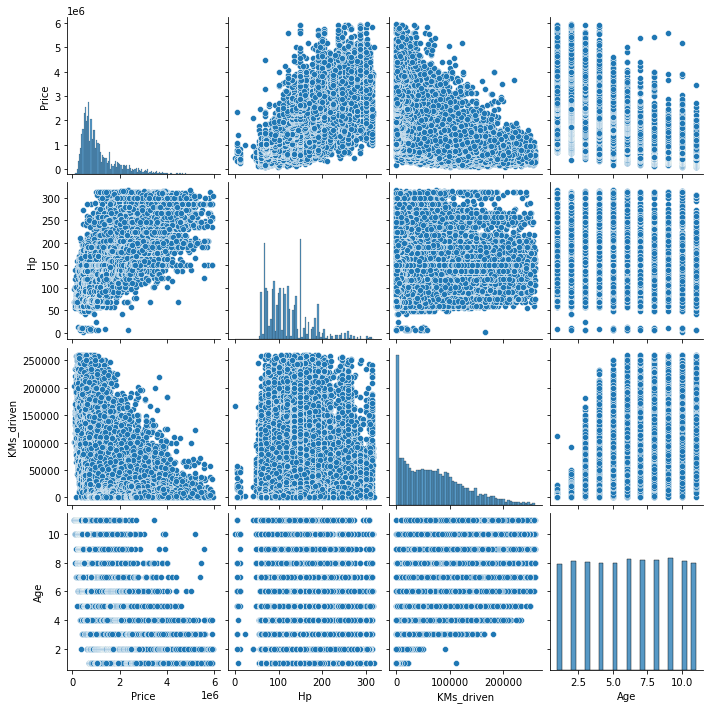

In [136]:
sns.pairplot(df)

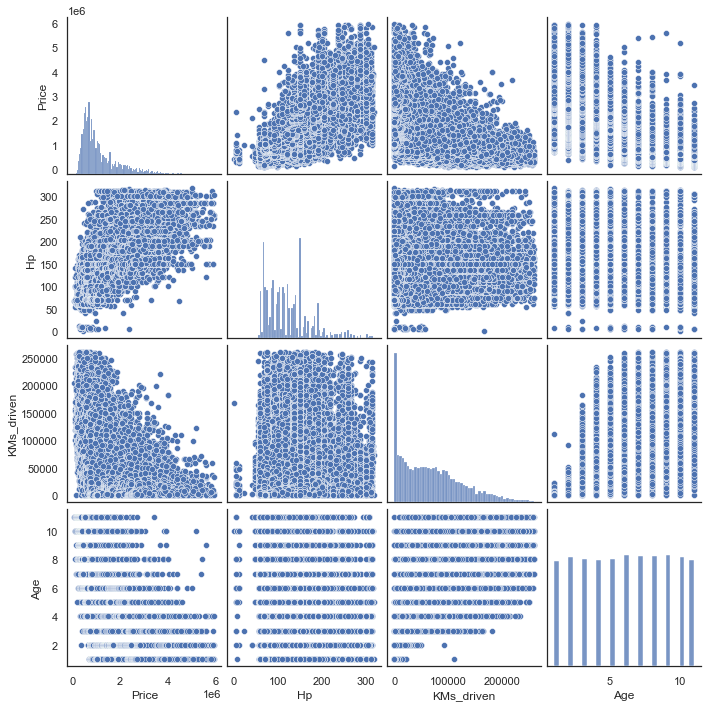

In [137]:
#ax = plt.figure(figsize=(15,10))
#ax.set(facecolor='orange')
sns.set_theme(style='white')
sns.pairplot(df)
plt.savefig('pair_plot.png',dpi = 200)

## 2. Create decision tree using label encoding on brand and model and check where it lies in feature importance curve

In [138]:
df.head()

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,KMs_driven,Age
0,BMW,Other,Diesel,Manual,Used,544000,116.0,235000,11
1,Volkswagen,Golf,Gasoline,Manual,Used,550160,122.0,92800,11
2,SEAT,Other,Gasoline,Manual,Used,552000,160.0,149300,11
3,Renault,Megane,Gasoline,Manual,Used,556000,110.0,96200,11
4,Peugeot,308,Gasoline,Manual,Used,556000,156.0,156000,11


In [139]:
df_copy = df.copy()

In [140]:
x= df_copy.drop(['Price'], axis=1)
y= df_copy.Price

In [141]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

#### Label Encoder

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
le = LabelEncoder()

In [144]:
x_train_label_encoded = x_train.copy()
x_test_label_encoded = x_test.copy()

In [145]:
x_train_label_encoded['Brand'] = le.fit_transform(x_train['Brand'])
x_test_label_encoded['Brand'] = le.transform(x_test['Brand'])
x_train_label_encoded

,Brand,Model,fuel,Gear_type,offerType,Hp,KMs_driven,Age
1278,28,Golf,Diesel,Manual,Used,105.0,132170,9
24854,19,Mokka,Gasoline,Manual,Used,140.0,9900,6
42262,19,Astra,Gasoline,Manual,Used,105.0,27178,4
1016,25,Fabia,Gasoline,Manual,Pre-registered,95.0,20,1
33730,23,Clio,Diesel,Manual,Used,75.0,55311,8
...,...,...,...,...,...,...,...,...
6639,28,Golf,Diesel,Manual,Used,110.0,185500,7
11858,2,116,Gasoline,Manual,Used,136.0,70000,9
39915,25,Octavia,Diesel,Automatic,Used,184.0,70705,6
949,23,Twingo,Gasoline,Manual,Used,69.0,29783,4


In [146]:
x_train_label_encoded['Model'] = le.fit_transform(x_train['Model'])
x_test_label_encoded['Model'] = le.transform(x_test['Model'])
x_train_label_encoded.head()

,Brand,Model,fuel,Gear_type,offerType,Hp,KMs_driven,Age
1278,28,51,Diesel,Manual,Used,105.0,132170,9
24854,19,68,Gasoline,Manual,Used,140.0,9900,6
42262,19,24,Gasoline,Manual,Used,105.0,27178,4
1016,25,48,Gasoline,Manual,Pre-registered,95.0,20,1
33730,23,42,Diesel,Manual,Used,75.0,55311,8


In [147]:
x_train_label_encoded['fuel'] = le.fit_transform(x_train['fuel'])
x_train_label_encoded['offerType'] = le.fit_transform(x_train['offerType'])
x_train_label_encoded['Gear_type'] = le.fit_transform(x_train['Gear_type'])

x_test_label_encoded['fuel'] = le.fit_transform(x_test['fuel'])
x_test_label_encoded['offerType'] = le.fit_transform(x_test['offerType'])
x_test_label_encoded['Gear_type'] = le.fit_transform(x_test['Gear_type'])

x_train_label_encoded.head()

,Brand,Model,fuel,Gear_type,offerType,Hp,KMs_driven,Age
1278,28,51,1,1,4,105.0,132170,9
24854,19,68,3,1,4,140.0,9900,6
42262,19,24,3,1,4,105.0,27178,4
1016,25,48,3,1,3,95.0,20,1
33730,23,42,1,1,4,75.0,55311,8


#### Decision tree for checking the feature importance

In [148]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
dt = DecisionTreeRegressor()

In [150]:
dt.fit(x_train_label_encoded , y_train)

DecisionTreeRegressor()

In [151]:
y_pred = dt.predict(x_test_label_encoded)
print(r2_score(y_test , y_pred))

0.8745580935729582


In [152]:
# plotting decision tree
from sklearn.tree import plot_tree

plot_tree(dt)

In [153]:
dt.feature_importances_

array([0.0274403 , 0.02709257, 0.01576541, 0.01073722, 0.00385727,
       0.53745915, 0.06193625, 0.31571183])

In [154]:
a = pd.DataFrame({"Column_name":x_train.columns, 'Feature_importance':dt.feature_importances_})

In [155]:
a

,Column_name,Feature_importance
0,Brand,0.027440
1,Model,0.027093
2,fuel,0.015765
3,Gear_type,0.010737
4,offerType,0.003857
5,Hp,0.537459
6,KMs_driven,0.061936
7,Age,0.315712


<BarContainer object of 8 artists>

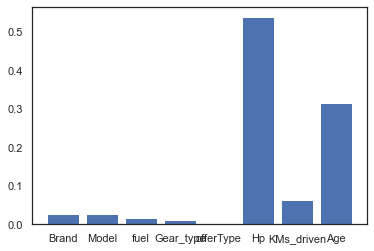

In [156]:
plt.bar(a['Column_name'], a['Feature_importance'])

In [157]:
df.Model.unique()

array(['Other', 'Golf', 'Megane', '308', 'Auris', 'Scenic', 'Zafira', '3',
       'Transit', 'Meriva', 'A4', 'Polo', 'Corsa', 'Picanto', 'Duster',
       'Astra', '118', 'Focus', 'B 180', 'Insignia', 'One', '320', 'Adam',
       '520', 'B-Max', 'Golf Variant', 'Touran', 'Leon', 'A1',
       'Golf Plus', 'Fiesta', 'Yaris', 'iX20', 'up!', 'Rapid/Spaceback',
       '116', 'Passat Variant', "Ceed / cee'd", 'Fabia', 'Ibiza', 'C-Max',
       'Superb', '208', 'Swift', 'Sandero', '2', 'A6', 'forTwo', 'Mii',
       'Citigo', 'Aygo', 'i10', 'forFour', 'Tiguan', 'Ateca', 'Q5',
       'XC90', 'X3', 'T-Roc', 'Vito', 'Kuga', 'Touareg', 'Panda',
       'Qashqai', 'Passat', 'Octavia', 'Mondeo', '2008', 'i20', 'Yeti',
       'Captur', 'Clio', 'C4', 'Rio', 'Caddy', 'ZOE', 'C3', 'Micra',
       'Twingo', 'Ka/Ka+', 'Space Star', '500', 'XC60', 'Arona',
       'EcoSport', 'Puma', 'i30', '207', 'Logan', 'Mokka', 'S-Max', '530',
       'E 220', 'A5', 'V60', 'E 200', 'A3', 'C 220', 'Tucson', 'A 180',
       '

In [158]:
df.Brand.unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Chevrolet', 'Audi', 'Fiat', 'Kia',
       'Dacia', 'MINI', 'Mercedes-Benz', 'Hyundai', 'Skoda', 'Citroen',
       'Other', 'Suzuki', 'smart', 'Volvo', 'Porsche', 'Nissan', 'Honda',
       'Mitsubishi', 'Jaguar', 'Jeep', 'Land', 'Alfa'], dtype=object)

## 3. Convert Every categorical column using one hot encoder and use PCA 

In [159]:
df.head()

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,KMs_driven,Age
0,BMW,Other,Diesel,Manual,Used,544000,116.0,235000,11
1,Volkswagen,Golf,Gasoline,Manual,Used,550160,122.0,92800,11
2,SEAT,Other,Gasoline,Manual,Used,552000,160.0,149300,11
3,Renault,Megane,Gasoline,Manual,Used,556000,110.0,96200,11
4,Peugeot,308,Gasoline,Manual,Used,556000,156.0,156000,11


In [160]:
df_copy = df.copy()

In [161]:
df_copy.isna().sum()

Brand         0
Model         0
fuel          0
Gear_type     0
offerType     0
Price         0
Hp            0
KMs_driven    0
Age           0
dtype: int64

In [162]:
df_copy.describe()

,Price,Hp,KMs_driven,Age
count,4.413800e+04,44138.000000,44138.000000,44138.000000
mean,1.163694e+06,123.138815,69718.977140,6.023087
std,8.350536e+05,50.725849,57332.238519,3.150353
min,8.800000e+04,1.000000,0.000000,1.000000
25%,5.988600e+05,86.000000,20100.000000,3.000000
50%,8.784000e+05,111.000000,60369.500000,6.000000
75%,1.463200e+06,150.000000,104900.000000,9.000000
max,5.949200e+06,318.000000,260000.000000,11.000000


In [163]:
df_copy.nunique()

Brand            31
Model           117
fuel              6
Gear_type         3
offerType         5
Price          5900
Hp              181
KMs_driven    19206
Age              11
dtype: int64

In [164]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44138 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       44138 non-null  object 
 1   Model       44138 non-null  object 
 2   fuel        44138 non-null  object 
 3   Gear_type   44138 non-null  object 
 4   offerType   44138 non-null  object 
 5   Price       44138 non-null  int64  
 6   Hp          44138 non-null  float64
 7   KMs_driven  44138 non-null  int64  
 8   Age         44138 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 4.4+ MB


In [165]:
df_copy.sample(5)

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,KMs_driven,Age
38430,Ford,Fiesta,Gasoline,Manual,Used,632000,101.0,49225,7
33877,Peugeot,108,Gasoline,Manual,Pre-registered,879120,72.0,10,1
5808,Peugeot,108,Gasoline,Manual,Used,551920,69.0,27001,7
3480,Volkswagen,Polo,Gasoline,Manual,Used,664000,60.0,116000,5
45722,Fiat,500,Electric,Manual,Pre-registered,1087200,69.0,10,1


In [166]:
object_col = [col for col in df_copy.columns
                 if df_copy[col].dtypes == 'O']
object_col

['Brand', 'Model', 'fuel', 'Gear_type', 'offerType']

In [167]:
numerical_col = set(df_copy.columns) - set(object_col)
numerical_col

{'Age', 'Hp', 'KMs_driven', 'Price'}

In [168]:
df.offerType.value_counts()

Used              38221
Pre-registered     2744
Demonstration      2106
Employee's car     1057
New                  10
Name: offerType, dtype: int64

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
# splitting data
x= df_copy.drop(['Price'], axis=1)
y= df_copy.Price

In [171]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state = 2)

In [172]:
object_col = [col for col in x_train.columns
                 if x_train[col].dtypes == 'O']
object_col

['Brand', 'Model', 'fuel', 'Gear_type', 'offerType']

In [173]:
numerical_col = set(x_train.columns) - set(object_col)
numerical_col

{'Age', 'Hp', 'KMs_driven'}

D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

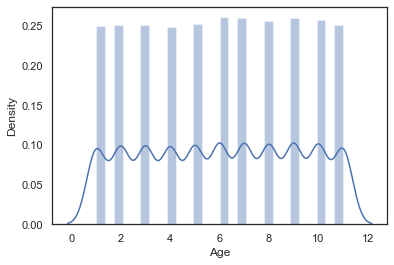

In [174]:
sns.distplot(x_train.Age)

D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hp', ylabel='Density'>

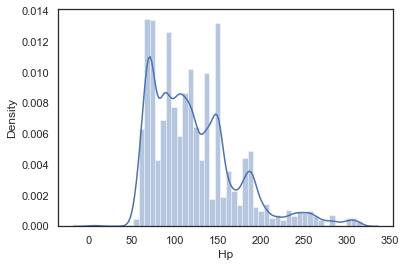

In [175]:
sns.distplot(x_train.Hp)

D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KMs_driven', ylabel='Density'>

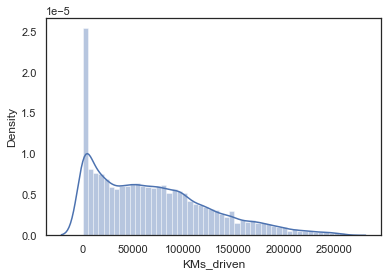

In [176]:
sns.distplot(x_train.KMs_driven)

## Power transformer

In [177]:
from sklearn.preprocessing import PowerTransformer

In [178]:
x_train_pow = x_train[numerical_col].copy()

C:\Users\shrey\AppData\Local\Temp\ipykernel_10636\3696067291.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_train_pow = x_train[numerical_col].copy()


In [179]:
pt = PowerTransformer()
x_train_pow[:] = pt.fit_transform(x_train_pow+0.000000001)

array([[<AxesSubplot:title={'center':'KMs_driven'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Hp'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 360x216 with 0 Axes>

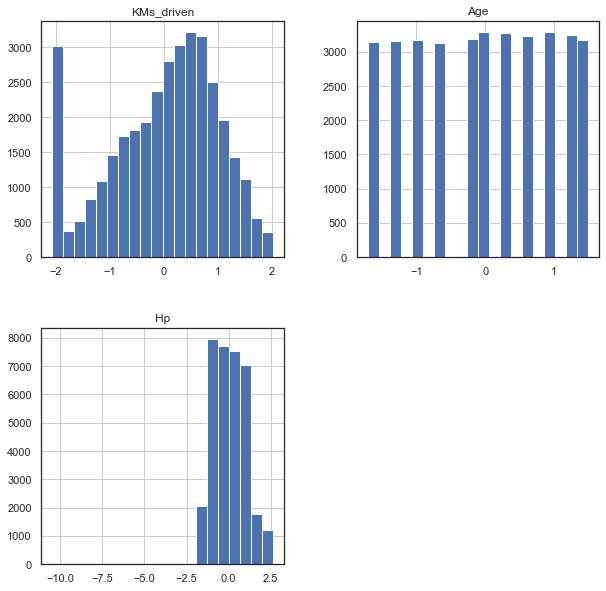

In [180]:
plt.figure(figsize=(5,3))

x_train_pow.hist(figsize=(10,10) , bins=20)

C:\Users\shrey\AppData\Local\Temp\ipykernel_10636\3551376832.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_train[numerical_col].hist(figsize=(10,10))


array([[<AxesSubplot:title={'center':'KMs_driven'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Hp'}>, <AxesSubplot:>]],
      dtype=object)

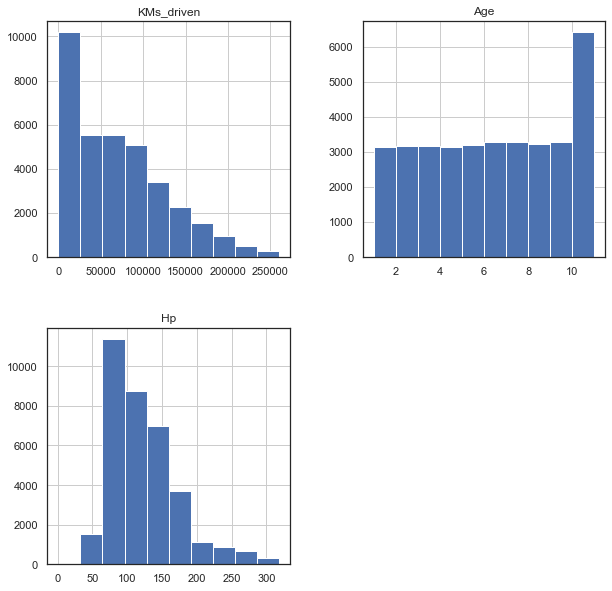

In [181]:
x_train[numerical_col].hist(figsize=(10,10))

In [182]:
x_train_pow

,KMs_driven,Age,Hp
23572,0.109941,0.050560,-0.278740
20825,0.006049,-0.594211,-0.459508
23906,0.409374,1.493410,-0.459508
24217,0.420814,0.050560,0.703014
6315,-0.450525,-1.307886,0.703014
...,...,...,...
32495,-0.175591,0.050560,-1.271320
31701,-0.857206,-0.939952,0.134763
7018,0.030284,0.938484,0.545396
36992,-0.158362,0.938484,2.520423


In [183]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [184]:
x_train_ss = x_train[numerical_col].copy()

C:\Users\shrey\AppData\Local\Temp\ipykernel_10636\877263726.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_train_ss = x_train[numerical_col].copy()


In [185]:
x_train_ss[:] = ss.fit_transform(x_train[numerical_col])
x_train_ss

C:\Users\shrey\AppData\Local\Temp\ipykernel_10636\2354400229.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_train_ss[:] = ss.fit_transform(x_train[numerical_col])


,KMs_driven,Age,Hp
23572,-0.214433,-0.009411,-0.413640
20825,-0.325002,-0.644173,-0.551682
23906,0.147547,1.577496,-0.551682
24217,0.162683,-0.009411,0.532936
6315,-0.724204,-1.278936,0.532936
...,...,...,...
32495,-0.500401,-0.009411,-1.064411
31701,-0.969380,-0.961555,-0.058674
7018,-0.299886,0.942733,0.355453
36992,-0.484725,0.942733,3.609308


array([[<AxesSubplot:title={'center':'KMs_driven'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Hp'}>, <AxesSubplot:>]],
      dtype=object)

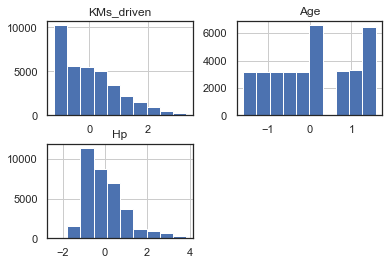

In [186]:
x_train_ss.hist()

### Applying power transformer to numerical columns

In [187]:
x_train_transform = x_train[numerical_col].copy()
x_test_transform = x_test[numerical_col].copy()

C:\Users\shrey\AppData\Local\Temp\ipykernel_10636\3430900290.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_train_transform = x_train[numerical_col].copy()
C:\Users\shrey\AppData\Local\Temp\ipykernel_10636\3430900290.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_test_transform = x_test[numerical_col].copy()


In [188]:
pt = PowerTransformer()

In [189]:
x_train_transform[:] = pt.fit_transform(x_train_transform)
x_test_transform[:] = pt.transform(x_test_transform)
x_train_transform.head()

,KMs_driven,Age,Hp
23572,0.109941,0.050560,-0.278740
20825,0.006049,-0.594211,-0.459508
23906,0.409374,1.493410,-0.459508
24217,0.420814,0.050560,0.703014
6315,-0.450525,-1.307886,0.703014


In [190]:
x_test_transform.head()

,KMs_driven,Age,Hp
37772,1.439298,0.650916,1.124769
32457,1.409543,0.650916,0.703014
40787,-0.210724,-0.265185,1.911584
23466,0.871653,1.493410,-1.059861
14302,-0.798227,-0.939952,0.703014


### Applying One hot encoder to categorical column

In [191]:
from sklearn.preprocessing import OneHotEncoder

In [192]:
ohe = OneHotEncoder(handle_unknown = 'ignore' , sparse=False)

In [193]:
x_train_ohe = x_train[object_col].copy()
x_test_ohe = x_test[object_col].copy()

In [194]:
x_train_ohe = pd.DataFrame(ohe.fit_transform(x_train_ohe))
x_test_ohe = pd.DataFrame(ohe.transform(x_test_ohe))

In [195]:
# putting index back
x_train_ohe.index = x_train.index
x_test_ohe.index = x_test.index

In [196]:
x_train_ohe.columns = ohe.get_feature_names(object_col)
x_test_ohe.columns = ohe.get_feature_names(object_col)
x_train_ohe.head()

D:\Anaconda\in\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\in\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Brand_Alfa,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Citroen,Brand_Dacia,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,...,fuel_LPG,fuel_Others,Gear_type_Automatic,Gear_type_Manual,Gear_type_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
23572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
20825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
24217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [197]:
x_test_ohe.head()

,Brand_Alfa,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Citroen,Brand_Dacia,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,...,fuel_LPG,fuel_Others,Gear_type_Automatic,Gear_type_Manual,Gear_type_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
37772,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
40787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23466,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [198]:
x_train_ohe.shape , x_test_ohe.shape

((35310, 162), (8828, 162))

In [199]:
x_train.head()

,Brand,Model,fuel,Gear_type,offerType,Hp,KMs_driven,Age
23572,Mercedes-Benz,Other,Gasoline,Manual,Used,102.0,57518,6
20825,Opel,Astra,Diesel,Manual,Used,95.0,51170,4
23906,Peugeot,207,Gasoline,Manual,Used,95.0,78300,11
24217,Volvo,V60,Gasoline,Automatic,Used,150.0,79169,6
6315,Ford,Focus,Diesel,Automatic,Employee's car,150.0,28251,2


In [200]:
x_train_ohe.head()

,Brand_Alfa,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Citroen,Brand_Dacia,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,...,fuel_LPG,fuel_Others,Gear_type_Automatic,Gear_type_Manual,Gear_type_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
23572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
20825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
24217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [201]:
x_train_transform.head()

,KMs_driven,Age,Hp
23572,0.109941,0.050560,-0.278740
20825,0.006049,-0.594211,-0.459508
23906,0.409374,1.493410,-0.459508
24217,0.420814,0.050560,0.703014
6315,-0.450525,-1.307886,0.703014


In [202]:
x_train_transformed = pd.concat([x_train_transform , x_train_ohe] , axis=1)
x_test_transformed = pd.concat([x_test_transform , x_test_ohe] , axis=1)

print(x_train_transformed.shape , x_test_transformed.shape)

(35310, 165) (8828, 165)


In [203]:
x_train_transformed.head()

,KMs_driven,Age,Hp,Brand_Alfa,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Citroen,Brand_Dacia,Brand_Fiat,...,fuel_LPG,fuel_Others,Gear_type_Automatic,Gear_type_Manual,Gear_type_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
23572,0.109941,0.050560,-0.278740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
20825,0.006049,-0.594211,-0.459508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23906,0.409374,1.493410,-0.459508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
24217,0.420814,0.050560,0.703014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6315,-0.450525,-1.307886,0.703014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [204]:
x_test_transformed.isna().sum().sort_values()

KMs_driven        0
Model_One         0
Model_Other       0
Model_Panda       0
Model_Passat      0
                 ..
Model_Adam        0
Model_Arona       0
Model_Astra       0
Model_Auris       0
offerType_Used    0
Length: 165, dtype: int64

### Applying PCA

In [205]:
from sklearn.decomposition import PCA

In [206]:
pca = PCA(n_components = 150)

In [207]:
import time
start = time.time()
x_train_pca = pca.fit_transform(x_train_transformed)
x_test_pca = pca.transform(x_test_transformed)
print(time.time()-start)

10.145021438598633


In [208]:
x_train_pca

array([[-1.48258550e-01,  4.28496418e-01, -3.85033869e-01, ...,
         1.23177775e-02,  1.61746492e-02,  1.32666133e-02],
       [ 1.79719996e-01,  2.33909974e-01,  1.16304583e+00, ...,
         2.84989132e-03,  3.36543178e-03,  2.09289334e-03],
       [-1.34960838e+00,  8.14730730e-01, -6.56855072e-01, ...,
         3.75951644e-02,  1.33755937e-01, -1.34691069e-01],
       ...,
       [-6.54508004e-01, -1.31996604e-01, -9.90342716e-01, ...,
        -1.27187480e-03, -2.13110537e-03, -1.58734235e-03],
       [-3.22006975e-01, -2.57345648e+00, -1.16728690e+00, ...,
        -1.51072688e-02,  7.75709518e-03,  1.64849778e-03],
       [-1.56435844e+00,  1.11070102e+00,  6.90982843e-02, ...,
         1.09005131e-02, -1.51990392e-02, -7.32756580e-03]])

In [209]:
pca.explained_variance_ratio_

array([3.17164751e-01, 2.17942273e-01, 5.64883559e-02, 4.52106096e-02,
       3.11679597e-02, 2.52720881e-02, 2.28011744e-02, 2.02175600e-02,
       1.59840180e-02, 1.37406696e-02, 1.25399906e-02, 1.09359584e-02,
       9.06225889e-03, 8.96233837e-03, 8.60480358e-03, 8.24609223e-03,
       7.85042486e-03, 7.51985236e-03, 6.60565339e-03, 5.78006562e-03,
       5.46233093e-03, 5.13854769e-03, 4.90548477e-03, 4.68015433e-03,
       4.56129552e-03, 4.32951022e-03, 4.04455271e-03, 4.00674944e-03,
       3.55500668e-03, 3.36285853e-03, 3.27488961e-03, 3.07417381e-03,
       2.95347237e-03, 2.84548303e-03, 2.57043998e-03, 2.45220194e-03,
       2.33779107e-03, 2.24571263e-03, 2.17968743e-03, 2.02777134e-03,
       1.97895467e-03, 1.85183673e-03, 1.78600568e-03, 1.74817527e-03,
       1.70255230e-03, 1.63324015e-03, 1.59540733e-03, 1.54407194e-03,
       1.45062726e-03, 1.42676580e-03, 1.38880575e-03, 1.37776525e-03,
       1.33951676e-03, 1.31508752e-03, 1.23784037e-03, 1.23180315e-03,
      

### Finding the value of n components for which eigen value can explain 90% of data

In [210]:
from sklearn.decomposition import PCA

In [211]:
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(x_train_transformed)
x_test_pca = pca.transform(x_test_transformed)

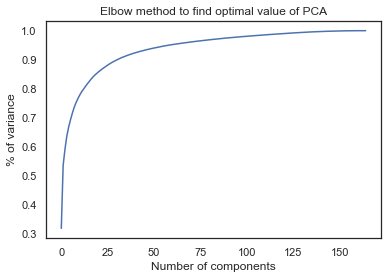

In [212]:
# applying cumulative sum and plotting

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Elbow method to find optimal value of PCA")
plt.xlabel("Number of components")
plt.ylabel("% of variance")
plt.show()

As we can see, around 50 eigen vectors can explain 90% of data

Taking n_components = 50

In [213]:
pca = PCA(n_components = 60)
x_train_pca = pca.fit_transform(x_train_transformed)
x_test_pca = pca.transform(x_test_transformed)

### Modelling

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [215]:
grid = {"Linear Regression": LinearRegression(),
        "Random Forest":RandomForestRegressor(),
        "XGBoost Regressor":XGBRegressor(n_estimators = 1000 , 
                    learning_rate = 0.05 , 
                    n_jobs = 4)}

In [216]:
score = []
mse = []
mae = []
rmse = []
for name,model in grid.items():
    model.fit(x_train_pca , y_train)
        
    y_pred = model.predict(x_test_pca)
    score.append(r2_score(y_test , y_pred))
    mae.append(mean_absolute_error(y_test , y_pred))
    mse.append(mean_squared_error(y_test,y_pred))
    rmse.append(np.sqrt(mse))
print(name,"\n",score,"\n", mae,"\n", mse,"\n", rmse)

XGBoost Regressor 
 [0.8155498397978652, 0.9306693950495618, 0.9348451929301641] 
 [239366.61509988498, 125831.45179044979, 124361.53737044064] 
 [127353397974.5619, 47869235322.94169, 44986060546.80229] 
 [array([356866.07848682]), array([356866.07848682, 218790.39129482]), array([356866.07848682, 218790.39129482, 212099.17620491])]


In [217]:
print("**********  Evaluation score of Linear Regression **********")
print(f"R2 score:{score[0]}")
print(f"Mean absolute error:{mae[0]}")
print(f"Mean squared error:{mse[0]}")
print(f"Root mean squared error:{rmse[0]}")

**********  Evaluation score of Linear Regression **********
R2 score:0.8155498397978652
Mean absolute error:239366.61509988498
Mean squared error:127353397974.5619
Root mean squared error:[356866.07848682]


In [220]:
print("**********  Evaluation score of Random Forest Regressor **********")
print(f"R2 score:{score[1]}")
print(f"Mean absolute error:{mae[1]}")
print(f"Mean squared error:{mse[1]}")
print(f"Root mean squared error:{rmse[1][1]}")

**********  Evaluation score of Random Forest Regressor **********
R2 score:0.9306693950495618
Mean absolute error:125831.45179044979
Mean squared error:47869235322.94169
Root mean squared error:218790.39129482282


In [221]:
print("**********  Evaluation score of XGBoost Regressor **********")
print(f"R2 score:{score[2]}")
print(f"Mean absolute error:{mae[2]}")
print(f"Mean squared error:{mse[2]}")
print(f"Root mean squared error:{rmse[2][2]}")

**********  Evaluation score of XGBoost Regressor **********
R2 score:0.9348451929301641
Mean absolute error:124361.53737044064
Mean squared error:44986060546.80229
Root mean squared error:212099.17620491196


In [224]:
r = {"Models":['Linear Regression','Random Forest Regressor','XGBoost Regressor'],
     "R2_score":score,
     "MAE":mae,
     "MSE":mse,
     "RMSE":[rmse[0][0],rmse[1][1],rmse[2][2]]}
rr=(pd.DataFrame(r))

In [225]:
print(rr)

                    Models  R2_score           MAE           MSE  \
0        Linear Regression  0.815550  239366.61510  1.273534e+11   
1  Random Forest Regressor  0.930669  125831.45179  4.786924e+10   
2        XGBoost Regressor  0.934845  124361.53737  4.498606e+10   

            RMSE  
0  356866.078487  
1  218790.391295  
2  212099.176205  


In [226]:
len(score)

3

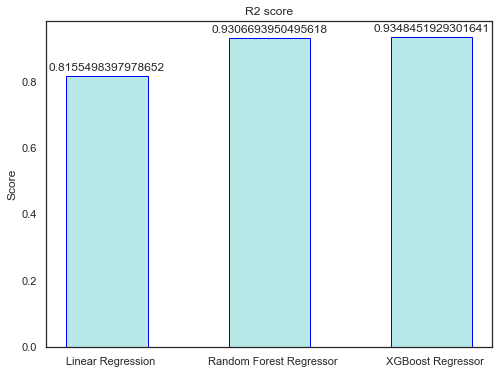

In [265]:
label = ['Linear Regression','Random Forest Regressor','XGBoost Regressor'] 
x = np.arange(3) # the label locations
width = 0.5 # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('Score')
ax.set_title('R2 score')
ax.set_xticks(x)
ax.set_xticklabels(label)

pps = ax.bar(x - width/25, score ,width, label='population',color=(0.1,0.7,0.7,0.3),edgecolor=['blue'])
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

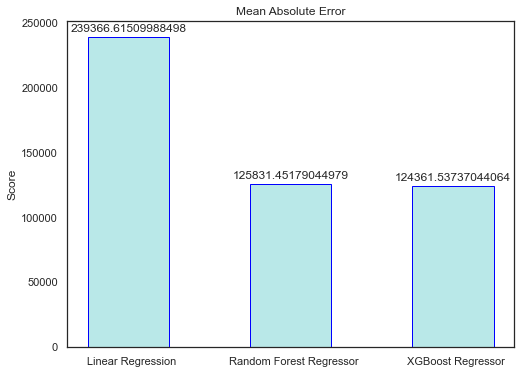

In [266]:
label = ['Linear Regression','Random Forest Regressor','XGBoost Regressor'] 
x = np.arange(3) # the label locations
width = 0.5 # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('Score')
ax.set_title('Mean Absolute Error')
ax.set_xticks(x)
ax.set_xticklabels(label)

pps = ax.bar(x - width/25, mae ,width, label='population',color=(0.1,0.7,0.7,0.3),edgecolor=['blue'])
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

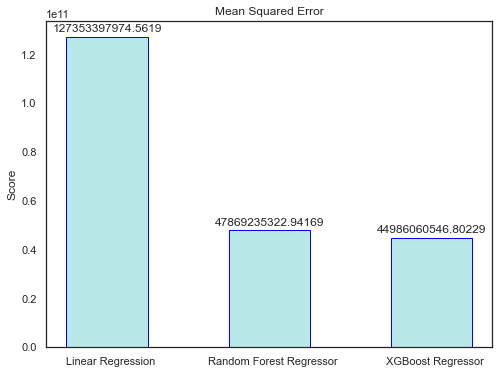

In [268]:
label = ['Linear Regression','Random Forest Regressor','XGBoost Regressor'] 
x = np.arange(3) # the label locations
width = 0.5 # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('Score')
ax.set_title('Mean Squared Error')
ax.set_xticks(x)
ax.set_xticklabels(label)

pps = ax.bar(x - width/25, mse ,width, label='population',color=(0.1,0.7,0.7,0.3),edgecolor=['blue'])
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

In [248]:
r = [rmse[0][0],rmse[1][1],rmse[2][2]]

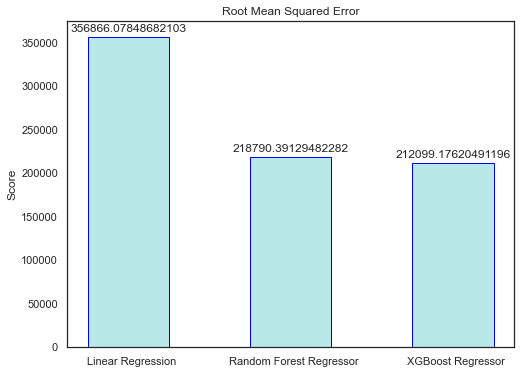

In [271]:
label = ['Linear Regression','Random Forest Regressor','XGBoost Regressor'] 
x = np.arange(3) # the label locations
width = 0.5 # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('Score')
ax.set_title('Root Mean Squared Error')
ax.set_xticks(x)
ax.set_xticklabels(label)

pps = ax.bar(x - width/25, r ,width, label='population',color=(0.1,0.7,0.7,0.3),edgecolor=['blue'])
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

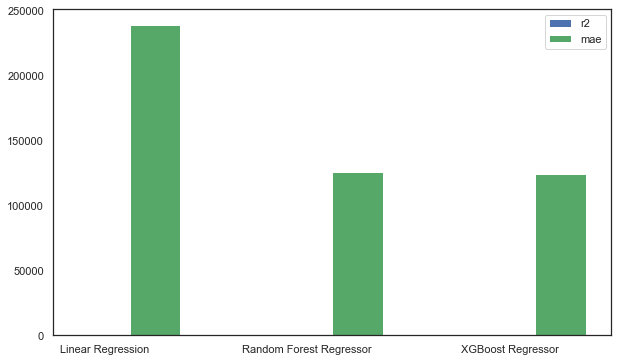

In [250]:
label = ['Linear Regression','Random Forest Regressor','XGBoost Regressor'] 

plt.figure(figsize=(10,6))
x = np.arange(3)
width = 0.25

plt.bar(x , score, width , color = 'b' , label = 'r2')

plt.bar(x +0.25, mae, width , color = 'g', label = 'mae')

plt.xticks(x , label)
plt.legend()

plt.show()

In [979]:
result['Random Forest ']

[0.9314414687043798, 125480.3993672873, 47336157968.495636, 217568.74308708878]

In [982]:
list(result.keys())

['Random Forest ', 'Linear Regression ', 'XGBoost Regressor']

In [980]:
r = {"Linear Regression":result['Linear Regression '],
     "Random Forest":result['Random Forest '],
     "XGBoost Regressor":result['XGBoost Regressor']}
print(pd.DataFrame(r))

   Linear Regression  Random Forest  XGBoost Regressor
0       8.155193e-01   9.314415e-01       9.350109e-01
1       2.394135e+05   1.254804e+05       1.246167e+05
2       1.273745e+11   4.733616e+10       4.487165e+10
3       3.568956e+05   2.175687e+05       2.118293e+05


In [977]:
r= pd.DataFrame(result)
r.T

,0,1,2,3
Random Forest,0.931441,125480.399367,4.733616e+10,217568.743087
Linear Regression,0.815519,239413.450945,1.273745e+11,356895.586077
XGBoost Regressor,0.935011,124616.656301,4.487165e+10,211829.293991


<BarContainer object of 4 artists>

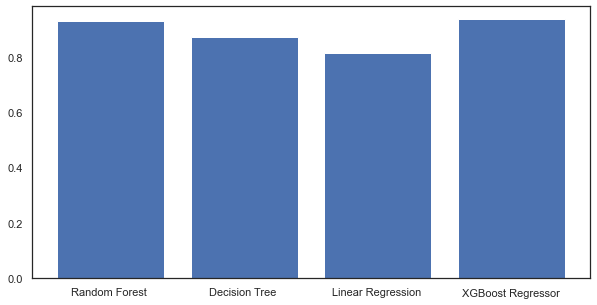

In [941]:
plt.figure(figsize=(10,5))
plt.bar(result.keys() , result.values())

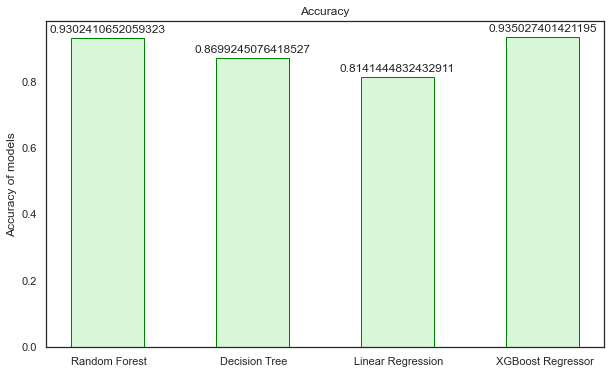

In [957]:
x = np.arange(4) # the label locations
width = 0.5 # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))

ax.set_ylabel('Accuracy of models')
ax.set_title('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(result.keys())

pps = ax.bar(x - width/25,result.values() ,width, label='population',color=(0.5,0.9,0.5,0.3),edgecolor=['green'])
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

In [953]:
import time
start = time.time()

for i in range(0 , 20 , 5):
    i=i/100
    model = XGBRegressor(n_estimators = 1000 , 
                    learning_rate = i , 
                    n_jobs = 4)
    model.fit(x_train_pca , y_train)
        
    y_pred = model.predict(x_test_pca)
    score = r2_score(y_test , y_pred)
    print(f"i = {i}    ,    score = {score}      ,     time = {start-time.time()}")

i = 0.0    ,    score = -2.0024991273185373      ,     time = -458.9230740070343
i = 0.05    ,    score = 0.9350108978286514      ,     time = -926.7595837116241
i = 0.1    ,    score = 0.9350387401045156      ,     time = -1406.309517621994



KeyboardInterrupt



In [950]:
r = np.arange(0.05 , 0.2, 0.05)
r

array([0.05, 0.1 , 0.15, 0.2 ])

In [332]:
rf = RandomForestRegressor()

In [176]:
rf.fit(x_train_pca , y_train)

RandomForestRegressor()

In [177]:
y_pred = rf.predict(x_test_pca , y_test)
r2_score(y_test , y_pred)

TypeError: predict() takes 2 positional arguments but 3 were given

In [ ]:
rf.predict([['BMW','Other','Diesel','Manual','Used',40.0 , 235000, 1]])

### Demo

In [292]:
df_copy = df.copy()
df_copy.head()

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,KMs_driven,Age
0,BMW,Other,Diesel,Manual,Used,544000,116.0,235000,11
1,Volkswagen,Golf,Gasoline,Manual,Used,550160,122.0,92800,11
2,SEAT,Other,Gasoline,Manual,Used,552000,160.0,149300,11
3,Renault,Megane,Gasoline,Manual,Used,556000,110.0,96200,11
4,Peugeot,308,Gasoline,Manual,Used,556000,156.0,156000,11


In [293]:
df_copy.iloc[:,[1,2,4]].head()

,Model,fuel,offerType
0,Other,Diesel,Used
1,Golf,Gasoline,Used
2,Other,Gasoline,Used
3,Megane,Gasoline,Used
4,308,Gasoline,Used


In [294]:
# splitting dataset
x = df_copy.drop(['Price'],axis=1)
y = df_copy.Price

In [295]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=2)

In [296]:
x_train.head()

,Brand,Model,fuel,Gear_type,offerType,Hp,KMs_driven,Age
23572,Mercedes-Benz,Other,Gasoline,Manual,Used,102.0,57518,6
20825,Opel,Astra,Diesel,Manual,Used,95.0,51170,4
23906,Peugeot,207,Gasoline,Manual,Used,95.0,78300,11
24217,Volvo,V60,Gasoline,Automatic,Used,150.0,79169,6
6315,Ford,Focus,Diesel,Automatic,Employee's car,150.0,28251,2


In [297]:
x_test.head()

,Brand,Model,fuel,Gear_type,offerType,Hp,KMs_driven,Age
37772,Audi,A5,Diesel,Manual,Used,177.0,180259,8
32457,Volkswagen,Golf,Diesel,Manual,Used,150.0,176609,8
40787,Ford,S-Max,Gasoline,Automatic,Used,241.0,39300,5
23466,Fiat,Other,Diesel,Manual,Used,75.0,118000,11
14302,Volkswagen,Other,Diesel,Manual,Used,150.0,15872,3


In [298]:
y_train.head()

23572    1176000
20825     996000
23906     388000
24217    1596000
6315     1698320
Name: Price, dtype: int64

### Power transformer

In [299]:
pt = PowerTransformer()

In [300]:
x_train_pow = x_train.copy()
x_test_pow = x_test.copy()

In [301]:
x_train_pow.iloc[:,[5,6,7]] = pt.fit_transform(x_train_pow.iloc[:,[5,6,7]] + 0.000000001)
x_test_pow.iloc[:,[5,6,7]] = pt.transform(x_test_pow.iloc[:,[5,6,7]] + 0.000000001 )
x_train_pow.head()

,Brand,Model,fuel,Gear_type,offerType,Hp,KMs_driven,Age
23572,Mercedes-Benz,Other,Gasoline,Manual,Used,-0.278740,0.109941,0.050560
20825,Opel,Astra,Diesel,Manual,Used,-0.459508,0.006049,-0.594211
23906,Peugeot,207,Gasoline,Manual,Used,-0.459508,0.409374,1.493410
24217,Volvo,V60,Gasoline,Automatic,Used,0.703014,0.420814,0.050560
6315,Ford,Focus,Diesel,Automatic,Employee's car,0.703014,-0.450525,-1.307886


In [302]:
x_test_pow.head()

,Brand,Model,fuel,Gear_type,offerType,Hp,KMs_driven,Age
37772,Audi,A5,Diesel,Manual,Used,1.124769,1.439297,0.650916
32457,Volkswagen,Golf,Diesel,Manual,Used,0.703014,1.409543,0.650916
40787,Ford,S-Max,Gasoline,Automatic,Used,1.911584,-0.210724,-0.265185
23466,Fiat,Other,Diesel,Manual,Used,-1.059861,0.871652,1.493410
14302,Volkswagen,Other,Diesel,Manual,Used,0.703014,-0.798227,-0.939952


### OneHotEncoder

In [303]:
ohe = OneHotEncoder(handle_unknown = 'ignore' , sparse=False)

In [304]:
x_train_ohe = x_train_pow.copy()
x_test_ohe = x_test_pow.copy()
x_train_ohe.head()

,Brand,Model,fuel,Gear_type,offerType,Hp,KMs_driven,Age
23572,Mercedes-Benz,Other,Gasoline,Manual,Used,-0.278740,0.109941,0.050560
20825,Opel,Astra,Diesel,Manual,Used,-0.459508,0.006049,-0.594211
23906,Peugeot,207,Gasoline,Manual,Used,-0.459508,0.409374,1.493410
24217,Volvo,V60,Gasoline,Automatic,Used,0.703014,0.420814,0.050560
6315,Ford,Focus,Diesel,Automatic,Employee's car,0.703014,-0.450525,-1.307886


In [305]:
x_train_ohe[:,] = ohe.fit_transform(x_train_ohe.iloc[:,0:5])
x_train_ohe

TypeError: unhashable type: 'slice'

## Making pipeline for the whole workflow

In [272]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [273]:
df_copy = df.copy()

### 

In [274]:
df_copy.sample()

,Brand,Model,fuel,Gear_type,offerType,Price,Hp,KMs_driven,Age
37725,Ford,EcoSport,Gasoline,Manual,Used,870400,125.0,55586,8


In [275]:
numerical_col = [6,7,8]
categorical_col = [0,1,2,3,4,5]

In [276]:
numerical_transformer = Pipeline(steps = [
    ("power_transformer",PowerTransformer())
])

categorical_transformer = Pipeline(steps = [
    ("ohe",OneHotEncoder(handle_unknown='ignore' , sparse=False))
])

pca_trf = PCA(n_components=60)

In [277]:
preprocessing = ColumnTransformer(transformers=[
    ("numerical_trf", numerical_transformer,[5,6,7]),
    ("categorical_trf",categorical_transformer , [0,1,2,3,4]),
], remainder='passthrough')

In [278]:
clf1 = Pipeline(steps = [
    ('preprocessing' , preprocessing),
    ('pca_trf', pca_trf),
    ('regressor', LinearRegression())
])

In [279]:
# splitting dataset
x = df_copy.drop(['Price'],axis=1)
y = df_copy.Price

In [280]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=2)

In [281]:
clf1.fit(x_train , y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_trf',
                                                  Pipeline(steps=[('power_transformer',
                                                                   PowerTransformer())]),
                                                  [5, 6, 7]),
                                                 ('categorical_trf',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [0, 1, 2, 3, 4])])),
                ('pca_trf', PCA(n_components=60)),
                ('regressor', LinearRegression())])

In [282]:
# for storing r2 score of all the algo
result = {}

In [283]:
y_pred = clf1.predict(x_test)
result['Logistic Regression'] = (r2_score(y_test , y_pred))

In [284]:
clf2= Pipeline(steps = [
    ('preprocessing' , preprocessing),
    ('pca_trf', pca_trf),
    ('regressor', DecisionTreeRegressor())
])

In [285]:
clf2.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_trf',
                                                  Pipeline(steps=[('power_transformer',
                                                                   PowerTransformer())]),
                                                  [5, 6, 7]),
                                                 ('categorical_trf',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [0, 1, 2, 3, 4])])),
                ('pca_trf', PCA(n_components=60)),
                ('regressor', DecisionTreeRegressor())])

In [286]:
y_pred = clf2.predict(x_test)
result['Decision Tree'] = r2_score(y_test , y_pred)

In [287]:
clf3 = Pipeline(steps = [
    ('preprocessing' , preprocessing),
    ('pca_trf', pca_trf),
    ('regressor', RandomForestRegressor())
])

In [288]:
clf3.fit(x_train , y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_trf',
                                                  Pipeline(steps=[('power_transformer',
                                                                   PowerTransformer())]),
                                                  [5, 6, 7]),
                                                 ('categorical_trf',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [0, 1, 2, 3, 4])])),
                ('pca_trf', PCA(n_components=60)),
                ('regressor', RandomForestRegressor())])

In [289]:
y_pred = clf3.predict(x_test)
result['Random Forest'] = r2_score(y_test , y_pred)

In [306]:
clf4 = Pipeline(steps = [
    ('preprocessing' , preprocessing),
    ('pca_trf', pca_trf),
    ('model', XGBRegressor(n_estimators = 1000 , 
                    learning_rate = 0.05 , 
                    n_jobs = 4))
])

In [307]:
clf4.fit(x_train , x_test)

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:Brand, Model, fuel, Gear_type, offerType

In [ ]:
y_pred = clf3.predict(x_test)
result['XGBoost'] = r2_score(y_test , y_pred)

<BarContainer object of 3 artists>

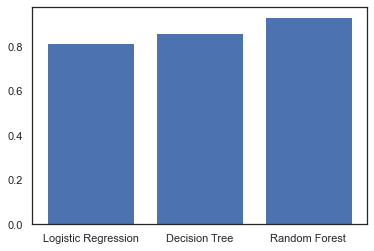

In [308]:
plt.bar(x = result.keys(), height= result.values())

In [309]:
result

{'Logistic Regression': 0.8154943456745589,
 'Decision Tree': 0.8601323818370552,
 'Random Forest': 0.930725337728855}

In [ ]:
df.head()

### Saving model

In [ ]:
import pickle

pickle.dump(clf3, open('model.pkl', 'wb'))

In [ ]:
preprocessing = ColumnTransformer(transformers=[
    ("numerical_trf", numerical_transformer,[5,6,7]),
    ("categorical_trf",categorical_transformer , [0,1,2,3,4]),
], remainder='passthrough')

In [ ]:
clf5 = Pipeline(steps = [
    ('preprocessing' , preprocessing),
    ('regressor', RandomForestRegressor())
])

In [ ]:
clf5.fit(x_train , y_train)

In [ ]:
y_pred = clf5.predict(x_test)
r2_score(y_test , y_pred)

In [ ]:
clf3.predict(pd.DataFrame([['BMW','Other','Diesel','Manual','Used',40.0 , 235000, 1]] , columns=["Brand", "Model","fuel",'Gear_type',
                                                          'offerType' ,'Hp','KMs_driven',"Age"]))

In [ ]:
x_train.head()

In [ ]:
print(type(clf3))

In [ ]:
x_train['Brand'].unique()

In [ ]:
x_train['Model'].unique()

## As Random Forest Regressor has the highest accuracy. We will use random forest

### XGBRegressor

! pip install xgboost

In [310]:
from xgboost import XGBRegressor

In [311]:
numerical_transformer = Pipeline(steps = [
    ("power_transformer",PowerTransformer())
])
categorical_transformer = Pipeline(steps = [
    ("ohe",OneHotEncoder(handle_unknown='ignore' , sparse=False))
])
pca_trf = PCA(n_components=60)

In [312]:
preprocessing = ColumnTransformer(transformers=[
    ("numerical_trf", numerical_transformer,[5,6,7]),
    ("categorical_trf",categorical_transformer , [0,1,2,3,4]),
], remainder='passthrough')

In [317]:
# pipeline to transform the valid dataset
x_valid = x_test.copy()
y_valid = y_test.copy()

eval_pipeline = Pipeline(steps=[("preprocessing",preprocessing),("pca",pca_trf)])
eval_pipeline.fit(x_train , y_train)
x_valid = eval_pipeline.transform(x_valid)

In [318]:
model = Pipeline(steps = [
    ('preprocessing' , preprocessing),
    ('pca_trf', pca_trf),
    ('model', XGBRegressor(n_estimators = 1000 , 
                    learning_rate = 0.05 , 
                    n_jobs = 4))
])

In [ ]:
model.fit(x_train , y_train , model__early_stopping_rounds = 5 , model__eval_metric = "mae",
          model__eval_set = [(x_valid , y_valid)] ,model__verbose = False)

In [320]:
y_pred  = model.predict(x_test)
print(r2_score(y_test , y_pred))

0.9267776175116894


In [321]:
model.predict([['BMW','Other','Diesel','Automatic','Used',40.0 , 50000, 10]])

D:\Anaconda\in\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
D:\Anaconda\in\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([438058.06], dtype=float32)

In [207]:
import pickle

In [209]:
pickle.dump(model, open('model.pkl', 'wb'))

### Hyper parameter tuining for XGB regressor

In [374]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'model__n_estimators': n_estimators,
    'model__max_depth':max_depth,
    'model__learning_rate':learning_rate,
    'model__min_child_weight':min_child_weight,
    'model__booster':booster,
    'model__base_score':base_score
    }

In [375]:
model = Pipeline(steps = [
    ('preprocessing' , preprocessing),
    ('pca_trf', pca_trf),
    ('model', XGBRegressor(n_estimators = 1000 , 
                    learning_rate = 0.05 , 
                    n_jobs = 4))
])

In [378]:
model = RandomizedSearchCV(model ,param_distributions = hyperparameter_grid, cv=5 , n_iter=50 ,n_jobs = 4, verbose=True)

In [ ]:
model.fit(x_train , y_train)

In [ ]:
y_pred = model.predict(x_test)
print(r2_score(y_test , y_pred ) )

### Hyper parameter tuining

### Randomized Search CV

In [377]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
param_grid1 = {"regressor__criterion":["gini", "entropy"],
              "regressor__max_features":['auto','sqrt','log2',0.5,1],
              "regressor__min_samples_leaf": np.arange(1,20,2),
              "regressor__min_samples_split": np.arange(2,20,2),
              "regressor__max_depth":np.arange(0,300,50)
             }

In [ ]:
clf2= Pipeline(steps = [
    ('preprocessing' , preprocessing),
    ('pca_trf', pca_trf),
    ('regressor', DecisionTreeRegressor())
])

In [ ]:
model = RandomizedSearchCV(clf2 ,param_distributions = param_grid1, cv=5 , n_iter=50 , verbose=True)

In [ ]:
model.fit(x_train , y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
r2_score(y_test , y_pred ) 

In [ ]:
model.best_params_

### Grid Search CV

In [ ]:
param_grid1 = {'regressor__n_estimators':np.arange(200,500,50),
              "regressor__max_features":['auto','sqrt'],
              "regressor__min_samples_leaf": np.arange(7,18,2),
              "regressor__min_samples_split": np.arange(2,15,2),
              "regressor__oob_score":[ False],
              'regressor__bootstrap':[True ],
              "regressor__max_depth":np.arange(50,250,50)
             }

In [ ]:
model1 = GridSearchCV(clf3 , param_grid = param_grid , cv=5 , verbose = True)

In [ ]:
model1.fit(x_train , y_train)

In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
r2_score(y_test , y_pred ) 

In [ ]:
model1.best_params_

### 